## new realistic version

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import odespy
import seaborn as sns
sns.set_style("whitegrid")
import os
from scipy.spatial import distance_matrix
from scipy.sparse import coo_matrix
from datetime import datetime
import time
from tqdm import tqdm
import h5py
import pylab
import math
from scipy.integrate import solve_ivp
from scipy.spatial import Delaunay, Voronoi, distance
import sys
cwd = os.getcwd()
sys.path.insert(1, cwd)

harddrive_path = '/Volumes/RayLab01/soft_particle_simulation_raw/'

import re
import shutil
import copy

from rs_helper import rock_string_helpers_realistic as rs
from rs_helper import rock_string_soft_helpers_SSmethod_ERbreak as rsssb
from rs_helper import rock_string_soft_helpers_SSmethod_ERbreak_fullc as rsssbc
from rs_helper import rock_string_soft_helpers_SSmethod_ERbreak_fullc_canvasVar as rsssbcv
from rs_helper import rock_string_analysis_helper as rsh
from rs_helper import rock_string_soft_analysis_helper_SSmethod as rsssh
from matplotlib import animation, rc, patches
from rs_helper.operations.operations import operations
import cython
from moviepy.editor import VideoFileClip, concatenate_videoclips
from IPython.display import HTML
PI = np.pi
import matplotlib.cm as cm

%load_ext Cython

import copy
import sys
from scipy import special
print(sys.getrecursionlimit())
sys.setrecursionlimit(30000)
print(sys.getrecursionlimit())

3000
30000


In [3]:
def extract_number(f):
    s = re.findall("\d+$",f)
    return (int(s[0]) if s else -1,f)

def batch_process_results_SS(List_dir_search, output_folder_base, skip = True):
    # summarize folders in search dates -> dic
    dic = {}
    for direc in List_dir_search:
        dic[direc] = []
    for i, direc in enumerate(List_dir_search):
        folders = np.sort(os.listdir(direc))
        if i == 0:
            for folder in folders:
                dic[direc].append(folder)
        else:
            for folder in folders:
                dic[direc].append(folder)
                for j in range(i):
                    if folder in dic[List_dir_search[j]]:
                        dic[List_dir_search[j]].remove(folder)
    
    # create combine dictionary
    dic_combine = {}
    for direc in List_dir_search:
        folders = np.sort(os.listdir(direc))
        for folder in folders:
            if folder in dic_combine.keys():
                dic_combine[folder].append(direc)
            else:
                dic_combine[folder] = copy.copy([direc])
    try:
        del dic_combine['.DS_Store']
    except Exception as e:
        print(e)
    
    if skip:
        pass
    else:
        for name in dic_combine.keys():
            full_folder_names = []
            for date in dic_combine[name]:
                try:
                    full_folder_names.append(date +'/' + name + '/')
                    rsssh.merge_folder_result(output_folder_base+name+'/',  
                                    *full_folder_names)
                except:
                    pass
                mv_folder_names = []
                #for full_folder in full_folder_names:
                #    mv_folder_names.append('archived_results_merged/' + full_folder)
                #for original, target in zip(full_folder_names, mv_folder_names):
                #    shutil.move(original,target)
    return dic, dic_combine

def batch_process_results_SS_selective(List_dir_search, output_folder_base, skip = True, full_process_list = None, finished = None):
    # summarize folders in search dates -> dic
    dic = {}
    for direc in List_dir_search:
        dic[direc] = []
    for i, direc in enumerate(List_dir_search):
        folders = np.sort(os.listdir(direc))
        if i == 0:
            for folder in folders:
                dic[direc].append(folder)
        else:
            for folder in folders:
                dic[direc].append(folder)
                for j in range(i):
                    if folder in dic[List_dir_search[j]]:
                        dic[List_dir_search[j]].remove(folder)
    
    # create combine dictionary
    dic_combine = {}
    for direc in List_dir_search:
        folders = np.sort(os.listdir(direc))
        for folder in folders:
            if folder in dic_combine.keys():
                dic_combine[folder].append(direc)
            else:
                dic_combine[folder] = copy.copy([direc])
    try:
        del dic_combine['.DS_Store']
    except Exception as e:
        print(e)
    
    if skip:
        pass
    else:
        for name in dic_combine.keys():
            if name in finished:
                if name in full_process_list:
                    pass
                else:
                    items = name.split('_')
                    if '20Julinit' in items:
                        pass
                    elif '18Auginit' in items:
                        pass
                    elif '20Jul' in items:
                        full_folder_names = []
                        for date in dic_combine[name]:
                            try:
                                #pass
                                if 'highVis' in items:
                                    full_folder_names.append(date +'/' + name + '/')
                                    rsssh.merge_folder_result(output_folder_base+'/highVis/'+name+'/',  
                                                    *full_folder_names)
                                    print(name)
                                elif 'medVis' in items:
                                    full_folder_names.append(date +'/' + name + '/')
                                    rsssh.merge_folder_result(output_folder_base+'/medVis/'+name+'/',  
                                                    *full_folder_names)
                                    print(name)
                                elif 'lowVis' in items:
                                    full_folder_names.append(date +'/' + name + '/')
                                    rsssh.merge_folder_result(output_folder_base+'/lowVis/'+name+'/',  
                                                    *full_folder_names)
                                    print(name)
                                else:
                                    pass
                            except:
                                pass
                            mv_folder_names = []
                            #for full_folder in full_folder_names:
                            #    mv_folder_names.append('archived_results_merged/' + full_folder)
                            #for original, target in zip(full_folder_names, mv_folder_names):
                            #    shutil.move(original,target)
                    elif '18Aug' in items:
                        full_folder_names = []
                        for date in dic_combine[name]:
                            try:
                                if 'highVis' in items:
                                    full_folder_names.append(date +'/' + name + '/')
                                    rsssh.merge_folder_result(output_folder_base+'/highVis/'+name+'/',  
                                                    *full_folder_names)
                                    print(name)
                                elif 'medVis' in items:
                                    full_folder_names.append(date +'/' + name + '/')
                                    rsssh.merge_folder_result(output_folder_base+'/medVis/'+name+'/',  
                                                    *full_folder_names)
                                    print(name)
                                elif 'medVis2' in items:
                                    full_folder_names.append(date +'/' + name + '/')
                                    rsssh.merge_folder_result(output_folder_base+'/medVis2/'+name+'/',  
                                                    *full_folder_names)
                                    print(name)
                                elif 'lowVis' in items:
                                    full_folder_names.append(date +'/' + name + '/')
                                    rsssh.merge_folder_result(output_folder_base+'/lowVis/'+name+'/',  
                                                    *full_folder_names)
                                    print(name)
                                else:
                                    pass
                            except Exception as e:
                                print(e)
                    else: 
                        pass
            else:
                pass
    return dic, dic_combine

def analyze_deformation_folder_result_soft(folder_name0, folder_names = None, copy_number0 = 0, save_file_name = None, varCanvas = True):
    """
    analyze the result output by deformation with hard BC
    """
    # load metadata and create empty class object
    metadata_file = pd.read_csv(folder_name0 + 'metadata.csv')
    if varCanvas == True:
        CF_sys = rsssbcv.Soft_and_Filament(dim = int(metadata_file['Dimensions']),
                                      Nc = int(metadata_file['N colloids']),
                                      Nv = int(metadata_file['N vertices']),
                                      Nf = int(metadata_file['N filaments']),
                                      Np = int(metadata_file['N particles per filament']),
                                      Rc = float(metadata_file['baseline radius']), 
                                      bidisperse = float(metadata_file['bidisperse']),
                                      mLf = float(metadata_file['normalized length of strings']),
                                      v_char = float(metadata_file['v_char']),
                                      Ca = float(metadata_file['Ca']),
                                      St = float(metadata_file['St']),
                                      Re_R = float(metadata_file['Re_R']),
                                      Stk = float(metadata_file['Stk']),
                                      K1 = float(metadata_file['K1']),
                                      K2_pos = float(metadata_file['K2_pos']),
                                      K2_neg = float(metadata_file['K2_neg']),
                                      K3 = float(metadata_file['K3']),
                                      K4 = float(metadata_file['K4']),
                                      kr_b = float(metadata_file['repulsive constant from wall']), 
                                      kr_bf = float(metadata_file['kr_bf']),
                                      rho = float(metadata_file['rho']),
                                      seed = int(metadata_file['Seed']),
                                      random_init = True,
                                      periodic_bc = metadata_file['periodic boundary'][0],
                                      full_repulsion = metadata_file['full repulsion'][0],
                                      Aspect_ratio = float(metadata_file['Aspect_ratio']),
                                      Length_radius_ratio = float(metadata_file['Length_radius_ratio']), 
                                           viscous_ratio = float(metadata_file['viscous_ratio']))
    else:
        CF_sys = rsssb.Soft_and_Filament(dim = int(metadata_file['Dimensions']),
                                      Nc = int(metadata_file['N colloids']),
                                      Nv = int(metadata_file['N vertices']),
                                      Nf = int(metadata_file['N filaments']),
                                      Np = int(metadata_file['N particles per filament']),
                                      Rc = float(metadata_file['baseline radius']), 
                                      bidisperse = float(metadata_file['bidisperse']),
                                      mLf = float(metadata_file['normalized length of strings']),
                                      v_char = float(metadata_file['v_char']),
                                      Ca = float(metadata_file['Ca']),
                                      St = float(metadata_file['St']),
                                      Re_R = float(metadata_file['Re_R']),
                                      Stk = float(metadata_file['Stk']),
                                      K1 = float(metadata_file['K1']),
                                      K2_pos = float(metadata_file['K2_pos']),
                                      K2_neg = float(metadata_file['K2_neg']),
                                      K3 = float(metadata_file['K3']),
                                      K4 = float(metadata_file['K4']),
                                      kr_b = float(metadata_file['repulsive constant from wall']), 
                                      kr_bf = float(metadata_file['kr_bf']),
                                      rho = float(metadata_file['rho']),
                                      seed = int(metadata_file['Seed']),
                                      random_init = True,
                                      periodic_bc = metadata_file['periodic boundary'][0],
                                      full_repulsion = metadata_file['full repulsion'][0],
                                      Aspect_ratio = float(metadata_file['Aspect_ratio']),
                                      Length_radius_ratio = float(metadata_file['Length_radius_ratio']))
    Nf = int(metadata_file['N filaments'])
    shrinkage_list = []
    Fx_list = []
    Fy_list = []
    time_list = []
    ER_intact_list = []
    contaminated_list = []
    
    Urep_list = []
    Ua_list = []
    Ub_list = []
    Ubf_list = []
    Ulc_list = []
    Ugamma_list = []
    Ul_list = []
    Ur_list = []
    Urb_list = []
    Urbf_list = []
    U_total_list = []
    peak_ER_strain_list = []
    
    z_colloid_arr = []
    z_filament_arr = []
    z_boundary_arr = []
    z_total_arr = []
    
    preserved_fraction_arr = []
    
    asp_all_arr = []
    ori_all_arr = []
    
    for i, folder_name in enumerate([folder_name0, *folder_names]):
        run = True
        W_input = 0
        skip = 0
        if i == 0:
            copy_number = copy_number0
            filename = folder_name+'/SimResults_{0:04d}.hdf5'.format(copy_number)
            CF_sys.load_data(filename)
            CF_sys.change_r_expanded(CF_sys.R[:, 0].flatten())
            vac_loc_original = CF_sys.r_center_matrix
        else:
            copy_number = 0
        print(folder_name)
        while run:
            try:
                filename = folder_name+'/SimResults_{0:04d}.hdf5'.format(copy_number)
                CF_sys.load_data(filename)
                kmax = len(CF_sys.Time)
                for k in range(1, kmax):
                    if len(time_list) > 0:
                        if CF_sys.Time[k] < time_list[-1]:
                            contaminated_list.append(copy_number)
                        else:
                            CF_sys.change_r_expanded(CF_sys.R[:, k].flatten())
                            CF_sys.get_separation_vectors()
                            if (i == 0) and (copy_number == copy_number0):
                                rp_original = CF_sys.compute_ridge_point()
                                preserved_fraction_arr.append(1)
                            else:
                                rp = CF_sys.compute_ridge_point()
                                preserved_fraction_arr.append(rsssh.compare_ridge_points(rp_original, rp))
                            shrinkage_list.append(max(CF_sys.canvas.xy[:,0])/(CF_sys.Lx0/2))
                            if Nf > 0:
                                peak_ER_strain_list.append((np.max(CF_sys.dr) - CF_sys.dLf)/CF_sys.dLf)
                            time_list.append(CF_sys.Time[k])
                            Fx, Fy = CF_sys.canvas.find_force_on_walls_heuristic(
                                CF_sys.r[0:CF_sys.Nc*CF_sys.Nv].reshape((CF_sys.Nc*CF_sys.Nv,1)), 
                                CF_sys.r[CF_sys.Nc*CF_sys.Nv:2*CF_sys.Nc*CF_sys.Nv].reshape((CF_sys.Nc*CF_sys.Nv,1)), 
                                CF_sys.delta_wall)
                            Fx = (np.sum(np.abs(Fx)))/2*CF_sys.kr*CF_sys.kr_b
                            Fx_list.append(Fx)
                            ER_intact_list.append(np.sum(np.sum(CF_sys.ER_intact, axis = 1) == (CF_sys.Np-1))/CF_sys.Nf)
                            U_result = CF_sys.compute_potential_energy(CF_sys.r_expanded)
                            Urep_list.append(U_result['U_rep_colloid'])
                            Ua_list.append(U_result['Ua'])
                            Ub_list.append(U_result['Ub'])
                            Ubf_list.append(U_result['Ubf'])
                            Ulc_list.append(U_result['Ulc'])
                            Ugamma_list.append(U_result['Ugamma'])
                            Ul_list.append(U_result['Ul'])
                            Ur_list.append(U_result['Ur'])
                            Urb_list.append(U_result['Urb'])
                            Urbf_list.append(U_result['Urbf'])
                            U_total_list.append(U_result['U_total'])

                            z_result = CF_sys.compute_contact_number()
                            z_colloid_arr.append(z_result['z_colloid_mean'])
                            z_filament_arr.append(z_result['z_filament_mean'])
                            z_boundary_arr.append(z_result['z_boundary_mean'])
                            z_total_arr.append(z_result['z_colloid_mean']+z_result['z_filament_mean']+z_result['z_boundary_mean'])
                            
                            DXDY = CF_sys.r_matrix - CF_sys.r_center_matrix.T[:,:,None]
                            cov_all = np.zeros((CF_sys.Nc, CF_sys.dim, CF_sys.dim))
                            cov_all[:,0,0] = np.sum(DXDY[0,:,:]*DXDY[0,:,:], axis = 1)/(CF_sys.Nv-1)
                            cov_all[:,1,1] = np.sum(DXDY[1,:,:]*DXDY[1,:,:], axis = 1)/(CF_sys.Nv-1)
                            cov_all[:,1,0] = np.sum(DXDY[1,:,:]*DXDY[0,:,:], axis = 1)/(CF_sys.Nv-1)
                            cov_all[:,0,1] = np.sum(DXDY[0,:,:]*DXDY[1,:,:], axis = 1)/(CF_sys.Nv-1)
                            eig_val, eig_vec = np.linalg.eig(cov_all)
                            order = np.argmax(eig_val, axis = 1).reshape((CF_sys.Nc, 1))
                            eig_vec_great = eig_vec[:,:,0]*(1-order) + eig_vec[:,:,1]*(order)
                            asp_all = np.max(eig_val, axis = 1)/np.min(eig_val, axis = 1)
                            ori_all = np.arctan2(eig_vec_great[:,1], eig_vec_great[:,0])%np.pi
                            asp_all_arr.append(asp_all)
                            ori_all_arr.append(ori_all)
                            
                    else:
                        CF_sys.change_r_expanded(CF_sys.R[:, k].flatten())
                        CF_sys.get_separation_vectors()
                        if (i == 0) and (copy_number == copy_number0):
                            rp_original = CF_sys.compute_ridge_point()
                            preserved_fraction_arr.append(1)
                        else:
                            rp = CF_sys.compute_ridge_point()
                            preserved_fraction_arr.append(rsssh.compare_ridge_points(rp_original, rp))
                        shrinkage_list.append(max(CF_sys.canvas.xy[:,0])/(CF_sys.Lx0/2))
                        if Nf > 0:
                            peak_ER_strain_list.append((np.max(CF_sys.dr*CF_sys.ER_intact) - CF_sys.dLf)/CF_sys.dLf)
                        time_list.append(CF_sys.Time[k])
                        Fx, Fy = CF_sys.canvas.find_force_on_walls_heuristic(
                            CF_sys.r[0:CF_sys.Nc*CF_sys.Nv].reshape((CF_sys.Nc*CF_sys.Nv,1)), 
                            CF_sys.r[CF_sys.Nc*CF_sys.Nv:2*CF_sys.Nc*CF_sys.Nv].reshape((CF_sys.Nc*CF_sys.Nv,1)), 
                            CF_sys.delta_wall)
                        Fx = (np.sum(np.abs(Fx)))/2*CF_sys.kr*CF_sys.kr_b
                        Fy = (np.sum(np.abs(Fy)))/2*CF_sys.kr*CF_sys.kr_b
                        Fx_list.append(Fx)
                        Fy_list.append(Fy)
                        ER_intact_list.append(np.sum(np.sum(CF_sys.ER_intact, axis = 1) == (CF_sys.Np-1))/CF_sys.Nf)
                        U_result = CF_sys.compute_potential_energy(CF_sys.r_expanded)
                        Urep_list.append(U_result['U_rep_colloid'])
                        Ua_list.append(U_result['Ua'])
                        Ub_list.append(U_result['Ub'])
                        Ubf_list.append(U_result['Ubf'])
                        Ulc_list.append(U_result['Ulc'])
                        Ugamma_list.append(U_result['Ugamma'])
                        Ul_list.append(U_result['Ul'])
                        Ur_list.append(U_result['Ur'])
                        Urb_list.append(U_result['Urb'])
                        Urbf_list.append(U_result['Urbf'])
                        U_total_list.append(U_result['U_total'])

                        z_result = CF_sys.compute_contact_number()
                        z_colloid_arr.append(z_result['z_colloid_mean'])
                        z_filament_arr.append(z_result['z_filament_mean'])
                        z_boundary_arr.append(z_result['z_boundary_mean'])
                        z_total_arr.append(z_result['z_colloid_mean']+z_result['z_filament_mean']+z_result['z_boundary_mean'])
                        
                        DXDY = CF_sys.r_matrix - CF_sys.r_center_matrix.T[:,:,None]
                        cov_all = np.zeros((CF_sys.Nc, CF_sys.dim, CF_sys.dim))
                        cov_all[:,0,0] = np.sum(DXDY[0,:,:]*DXDY[0,:,:], axis = 1)/(CF_sys.Nv-1)
                        cov_all[:,1,1] = np.sum(DXDY[1,:,:]*DXDY[1,:,:], axis = 1)/(CF_sys.Nv-1)
                        cov_all[:,1,0] = np.sum(DXDY[1,:,:]*DXDY[0,:,:], axis = 1)/(CF_sys.Nv-1)
                        cov_all[:,0,1] = np.sum(DXDY[0,:,:]*DXDY[1,:,:], axis = 1)/(CF_sys.Nv-1)
                        eig_val, eig_vec = np.linalg.eig(cov_all)
                        order = np.argmax(eig_val, axis = 1).reshape((CF_sys.Nc, 1))
                        eig_vec_great = eig_vec[:,:,0]*(1-order) + eig_vec[:,:,1]*(order)
                        asp_all = np.max(eig_val, axis = 1)/np.min(eig_val, axis = 1)
                        ori_all = np.arctan2(eig_vec_great[:,1], eig_vec_great[:,0])%np.pi
                        asp_all_arr.append(asp_all)
                        ori_all_arr.append(ori_all)
                
                copy_number += 1
            except Exception as e: 
                print(e)
                #run = False
                if skip < 5:
                    skip += 1
                    copy_number += 1
                    run = True
                else:
                    run = False
    
    ts = np.array(time_list)
    t_ms = (ts/CF_sys.T_contr*5)
    shrinkage_arr = np.array(shrinkage_list)
    Fx_arr = np.array(Fx_list)
    Fy_arr = np.array(Fy_list)
    ER_intact_arr = np.array(ER_intact_list)
    peak_ER_strain_arr = np.array(peak_ER_strain_list)
    Urep_arr = np.array(Urep_list)
    Ua_arr = np.array(Ua_list)
    Ub_arr = np.array(Ub_list)
    Ubf_arr = np.array(Ubf_list)
    Ulc_arr = np.array(Ulc_list)
    Ugamma_arr = np.array(Ugamma_list)
    Ul_arr = np.array(Ul_list)
    Ur_arr = np.array(Ur_list)
    Urb_arr = np.array(Urb_list)
    Urbf_arr = np.array(Urbf_list)
    U_total_arr = np.array(U_total_list)
    z_colloid_arr = np.array(z_colloid_arr)
    z_filament_arr = np.array(z_filament_arr)
    z_boundary_arr = np.array(z_boundary_arr)
    z_total_arr = np.array(z_total_arr)
    preserved_fraction_arr = np.array(preserved_fraction_arr)
    asp_all_arr = np.array(asp_all_arr)
    ori_all_arr = np.array(ori_all_arr)
    
    result = {'ts': ts, 
              't_ms': t_ms,
              'shrinkage_arr': shrinkage_arr,
              'peak_ER_strain_arr': peak_ER_strain_arr,
              'Fx_arr': Fx_arr,
              'Fy_arr': Fy_arr,
              'filament_fraction': CF_sys.filament_frac_initial, 
              'volume_fraction': CF_sys.vol_frac_actual,
              'ER_intact_arr': ER_intact_arr, 
              'T_contr': CF_sys.T_contr,
              'boundary_force': CF_sys.boundary_forces_external,
              'Urep_arr': Urep_arr,
              'Ua_arr': Ua_arr,
              'Ub_arr': Ub_arr,
              'Ubf_arr': Ubf_arr,
              'Ulc_arr': Ulc_arr,
              'Ugamma_arr': Ugamma_arr,
              'Ul_arr': Ul_arr,
              'Ur_arr': Ur_arr,
              'Urb_arr': Urb_arr,
              'Urbf_arr': Urbf_arr,
              'U_total_arr': U_total_arr, 
              'z_colloid_arr': z_colloid_arr,
              'z_filament_arr': z_filament_arr,
              'z_boundary_arr': z_boundary_arr,
              'z_total_arr': z_total_arr, 
              'preserved_fraction_arr': preserved_fraction_arr, 
             'contaminated_list': contaminated_list, 
             'asp_all_arr': asp_all_arr,
             'ori_all_arr': ori_all_arr, 
              'vac_loc_original': vac_loc_original}
    if save_file_name is None:
        pass
    else:
        file_name = save_file_name + '.hdf5'
        with h5py.File(file_name, "w") as f:
            dset = f.create_group("summarized data")
            dset.create_dataset('Time', data = result['ts'])
            dset.create_dataset('Time(ms)', data = result['t_ms'])
            dset.create_dataset('Shrinkage', data = result['shrinkage_arr'])
            dset.create_dataset('peak_ER_strain_arr', data = result['peak_ER_strain_arr'])
            dset.create_dataset('Force on the wall in x', data = result['Fx_arr'])
            dset.create_dataset('Force on the wall in y', data = result['Fy_arr'])
            dset.create_dataset('fraction of intact ER', data = result['ER_intact_arr'])
            dset.create_dataset('Urep_arr', data = result['Urep_arr'])
            dset.create_dataset('Ua_arr', data = result['Ua_arr'])
            dset.create_dataset('Ub_arr', data = result['Ub_arr'])
            dset.create_dataset('Ubf_arr', data = result['Ubf_arr'])
            dset.create_dataset('Ulc_arr', data = result['Ulc_arr'])
            dset.create_dataset('Ugamma_arr', data = result['Ugamma_arr'])
            dset.create_dataset('Ul_arr', data = result['Ul_arr'])
            dset.create_dataset('Ur_arr', data = result['Ur_arr'])
            dset.create_dataset('Urb_arr', data = result['Urb_arr'])
            dset.create_dataset('Urbf_arr', data = result['Urbf_arr'])
            dset.create_dataset('U_total_arr', data = result['U_total_arr'])
            dset.create_dataset('z_colloid_arr', data = result['z_colloid_arr'])
            dset.create_dataset('z_filament_arr', data = result['z_filament_arr'])
            dset.create_dataset('z_boundary_arr', data = result['z_boundary_arr'])
            dset.create_dataset('z_total_arr', data = result['z_total_arr'])
            dset.create_dataset('preserved_fraction_arr', data = result['preserved_fraction_arr'])
            dset.create_dataset('contaminated_list', data = result['contaminated_list'])
            dset.create_dataset('asp_all_arr', data = result['asp_all_arr'])
            dset.create_dataset('ori_all_arr', data = result['ori_all_arr'])
            dset.create_dataset('vac_loc_original', data = result['vac_loc_original'])
            dset.attrs['filament fraction'] = CF_sys.filament_frac_initial
            dset.attrs['volume fraction'] = CF_sys.vol_frac_actual
            dset.attrs['N colloids'] = CF_sys.Nc
            dset.attrs['N vertices'] = CF_sys.Nv
            dset.attrs['N filaments'] = CF_sys.Nf
            dset.attrs['N particles per filament'] = CF_sys.Np
            dset.attrs['mLf'] = CF_sys.mLf
            dset.attrs['Lx0'] = CF_sys.Lx0
            dset.attrs['Ly0'] = CF_sys.Ly0
            dset.attrs['T_contr'] = CF_sys.T_contr
            dset.attrs['boundary_force'] = CF_sys.boundary_forces_external
    return result, CF_sys

def analyze_summarized_folder(folder_name):
    h5file_list = os.listdir(folder_name)
    
    t_all = []
    dt_ms_all = []
    t_ms_all = []
    shrinkage_all = []
    shrinkage_rate_ms_all = []
    Fx_arr_all = []
    Fy_arr_all = []
    normalized_Fx_arr_all = []
    ERintact_all = []
    Urep_arr_all = []
    Ua_arr_all = []
    Ub_arr_all = []
    Ubf_arr_all = []
    Ulc_arr_all = []
    Ugamma_arr_all = []
    Ul_arr_all = []
    Ur_arr_all = []
    Urb_arr_all = []
    Urbf_arr_all = []
    U_total_arr_all = []
    z_colloid_arr_all = []
    z_filament_arr_all = []
    z_boundary_arr_all = []
    z_total_arr_all = []
    preserved_fraction_arr_all = []
    filament_fraction_all = []
    volume_fraction_all = []
    Nc_all = []
    Nv_all = []
    Nf_all = []
    Np_all = []
    T_contr_all = []
    boundary_forces_all = []
    id_all = []
    peak_ER_strain_all = []
    mLf_all = []
    E_conv_all = []
    Lx0_all = []
    Ly0_all = []
    
    shear_rate_sec_all = []
    Ly_t_meter_all = []
    Lx_t_meter_all = []
    Fx_newton_all = []
    Fy_newton_all = []
    px_Pa_all = []
    py_Pa_all = []
    G_eta_all = []
    
    deformation_all = []
    frac_dissipated_all = []
    
    for file_name in h5file_list:
        try:
            with h5py.File(folder_name+'/'+file_name, "r") as f:
                if('summarized data' in f.keys()):
                    h5file_list = os.listdir(folder_name)
                    dset = f['summarized data']
                    # new
                    boundary_forces_external = dset.attrs['boundary_force']
                    boundary_forces_all.append(boundary_forces_external)
                    try:
                        Lx0_all.append(dset.attrs['Lx0'])
                        Ly0_all.append(dset.attrs['Ly0'])
                        E_conv = 1E-9/(dset.attrs['Lx0']*boundary_forces_external)
                        E_conv_all.append(E_conv)
                        mLf_all.append(dset.attrs['mLf'])
                    except:
                        Lx0_all.append(100.0)
                        Ly0_all.append(10.0)
                        E_conv = 1E-9/(100.0*boundary_forces_external)
                        E_conv_all.append(E_conv)
                        mLf_all.append(6.4)
                    
                    t_all.append(dset["Time"][:])
                    t_ms = dset["Time(ms)"][:]
                    t_ms_all.append(dset["Time(ms)"][:])
                    dt = dset["Time(ms)"][:][0]
                    dt_ms_all.append(dt)
                    shrinkage = dset["Shrinkage"][:]
                    shrinkage_all.append(shrinkage)
                    shrinkage_rate_ms = (np.hstack([1, shrinkage[0:-1]]) - shrinkage)/(t_ms - np.hstack([0, t_ms[0:-1]]))
                    shrinkage_rate_ms_all.append(shrinkage_rate_ms)
                    Fx_arr = dset['Force on the wall in x'][:]
                    Fx_arr_all.append(Fx_arr)
                    Fy_arr = dset['Force on the wall in y'][:]
                    Fy_arr_all.append(Fy_arr)
                    
                    shear_rate_sec = shrinkage_rate_ms/shrinkage*1000
                    Ly_t_meter = dset.attrs['Ly0']/shrinkage*(1E-3/dset.attrs['Lx0'])
                    Lx_t_meter = dset.attrs['Lx0']*shrinkage*(1E-3/dset.attrs['Lx0'])
                    Fx_newton = Fx_arr*(1E-6/boundary_forces_external)
                    Fy_newton = Fy_arr*(1E-6/boundary_forces_external)
                    px_Pa = Fx_newton/Ly_t_meter**2
                    py_Pa = Fy_newton/(Ly_t_meter*Lx_t_meter*2)
                    G_eta = (px_Pa)/shear_rate_sec
                    
                    shear_rate_sec_all.append(shear_rate_sec)
                    Ly_t_meter_all.append(Ly_t_meter)
                    Lx_t_meter_all.append(Lx_t_meter)
                    Fx_newton_all.append(Fx_newton)
                    Fy_newton_all.append(Fy_newton)
                    px_Pa_all.append(px_Pa)
                    py_Pa_all.append(py_Pa)
                    G_eta_all.append(G_eta)
                    
                    deformation = 1-shrinkage
                    frac_dissipated = np.sum(Fx_arr[0:-1]/dset.attrs['boundary_force']*(deformation[1:] - deformation[0:-1]))/(deformation[-1]-deformation[0])
                    deformation_all.append(deformation)
                    frac_dissipated_all.append(frac_dissipated)
                    
                    normalized_Fx_arr_all.append(Fx_arr/dset.attrs['boundary_force'])
                    ERintact_all.append(dset['fraction of intact ER'][:])
                    Urep_arr_all.append(dset['Urep_arr'][:])
                    Ua_arr_all.append(dset['Ua_arr'][:])
                    Ub_arr_all.append(dset['Ub_arr'][:])
                    Ubf_arr_all.append(dset['Ubf_arr'][:])
                    Ulc_arr_all.append(dset['Ulc_arr'][:])
                    Ugamma_arr_all.append(dset['Ugamma_arr'][:])
                    Ul_arr_all.append(dset['Ul_arr'][:])
                    Ur_arr_all.append(dset['Ur_arr'][:])
                    Urb_arr_all.append(dset['Urb_arr'][:])
                    Urbf_arr_all.append(dset['Urbf_arr'][:])
                    U_total_arr_all.append(dset['U_total_arr'][:])
                    z_colloid_arr_all.append(dset['z_colloid_arr'][:])
                    z_filament_arr_all.append(dset['z_filament_arr'][:])
                    z_boundary_arr_all.append(dset['z_boundary_arr'][:])
                    z_total_arr_all.append(dset['z_total_arr'][:])
                    preserved_fraction_arr_all.append(dset['preserved_fraction_arr'][:])
                    filament_fraction_all.append(dset.attrs['filament fraction'])
                    volume_fraction_all.append(dset.attrs['volume fraction'])
                    Nc_all.append(dset.attrs['N colloids'])
                    Nv_all.append(dset.attrs['N vertices'])
                    Nf_all.append(dset.attrs['N filaments'])
                    Np_all.append(dset.attrs['N particles per filament'])
                    T_contr_all.append(dset.attrs['T_contr'])
                    id_all.append(file_name)
                    peak_ER_strain_all.append(dset['peak_ER_strain_arr'][:])
                    
        except Exception as e:
            print(e)
            print(file_name)
    result = {'t_all': t_all,
              't_ms_all': t_ms_all,
              'dt_ms_all': dt_ms_all,
              'shrinkage_all': shrinkage_all,
              'shrinkage_rate_ms_all': shrinkage_rate_ms_all,
              'Fx_arr_all': Fx_arr_all,
              'Fy_arr_all': Fy_arr_all,
              'normalized_Fx_arr_all': normalized_Fx_arr_all,
              'ERintact_all': ERintact_all, 
              'Urep_arr_all': Urep_arr_all,
              'Ua_arr_all': Ua_arr_all,
              'Ub_arr_all': Ub_arr_all,
              'Ubf_arr_all': Ubf_arr_all,
              'Ulc_arr_all': Ulc_arr_all,
              'Ugamma_arr_all': Ugamma_arr_all,
              'Ul_arr_all': Ul_arr_all,
              'Ur_arr_all': Ur_arr_all,
              'Urb_arr_all': Urb_arr_all,
              'Urbf_arr_all': Urbf_arr_all,
              'U_total_arr_all': U_total_arr_all,
              'z_colloid_arr_all': z_colloid_arr_all,
              'z_filament_arr_all': z_filament_arr_all,
              'z_boundary_arr_all': z_boundary_arr_all,
              'z_total_arr_all': z_total_arr_all, 
              'preserved_fraction_arr_all': preserved_fraction_arr_all, 
              'filament_fraction_all': filament_fraction_all, 
              'volume_fraction_all': volume_fraction_all,
              'Nc_all': Nc_all, 
              'Nv_all': Nv_all, 
              'Nf_all': Nf_all, 
              'Np_all': Np_all,
              'T_contr_all': T_contr_all,
              'boundary_forces_all': boundary_forces_all, 
              'id_all': id_all,
              'peak_ER_strain_all': peak_ER_strain_all, 
              'mLf_all': mLf_all, 
              'E_conv_all': E_conv_all,
              'Lx0_all': Lx0_all, 
              'Ly0_all': Ly0_all, 
              'shear_rate_sec_all': shear_rate_sec_all,
              'Ly_t_meter_all': Ly_t_meter_all,
              'Lx_t_meter_all': Ly_t_meter_all,
              'Fx_newton_all': Fx_newton_all,
              'Fy_newton_all': Fy_newton_all,
              'px_Pa_all': px_Pa_all,
              'py_Pa_all': py_Pa_all,
              'G_eta_all': G_eta_all,
              'deformation_all': deformation_all,
              'frac_dissipated_all': frac_dissipated_all
             }
    return result

## Processing codes

In [14]:
List_dir_search = ['2022-07-21', '2022-07-22', '2022-07-23', '2022-07-25', '2022-07-26', '2022-07-27', 
                   '2022-07-28', '2022-07-29', '2022-07-30', '2022-07-31', '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05',
                   '2022-08-06', '2022-08-07', '2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12', '2022-08-13', '2022-08-14', 
                   '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21', '2022-08-22', '2022-08-23', '2022-08-24',
                   '2022-08-25', '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-03',
                   '2022-09-04', '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
                   '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17', '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22', '2022-09-23', 
                   '2022-09-24', '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
                   '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-10', '2022-10-11', 
                   #'2022-10-12','2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16', '2022-10-17',
                   #'2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23', '2022-10-24',
                   #'2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29', '2022-10-30', 
                   '2022-10-31', '2022-11-01', '2022-11-02',
                   '2022-11-03', '2022-11-04', '2022-11-05', '2022-11-06', '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11',
                   '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-19', '2022-11-20', '2022-11-21',
                   '2022-11-22', '2022-11-23', '2022-11-24', '2022-11-25', '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02', '2022-12-03',
                   '2022-12-04', '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-20', '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-27', 
                   '2022-12-28', '2022-12-29', '2022-12-31', '2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', 
                   '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09']

output_folder_base = 'soft_particle_simulation/mLf6.4/20Jul/'
list_dir_base = '/Volumes/RayLab01/soft_particle_simulation_raw/'
for i, item in enumerate(List_dir_search):
    List_dir_search[i] = list_dir_base + item
dic_full, dic_combine_full = batch_process_results_SS(List_dir_search, output_folder_base, skip = True)

In [4]:
summarized_Nc110_lowVis_mLf48 = analyze_summarized_folder('/Volumes/RayLab01/soft_particle_simulation_incorp/Hdf5_Aug18/lowVis/mLf4.8/Nc110/')
summarized_Nc130_lowVis_mLf48 = analyze_summarized_folder('/Volumes/RayLab01/soft_particle_simulation_incorp/Hdf5_Aug18/lowVis/mLf4.8/Nc130/')
summarized_Nc110_highVis_mLf48 = analyze_summarized_folder('/Volumes/RayLab01/soft_particle_simulation_incorp/Hdf5_Aug18/highVis/Nc110/')
summarized_Nc130_highVis_mLf48 = analyze_summarized_folder('/Volumes/RayLab01/soft_particle_simulation_incorp/Hdf5_Aug18/highVis/Nc130/')

## Fig 3

Loading Simulation data from disk .......
Loading hdf5 file


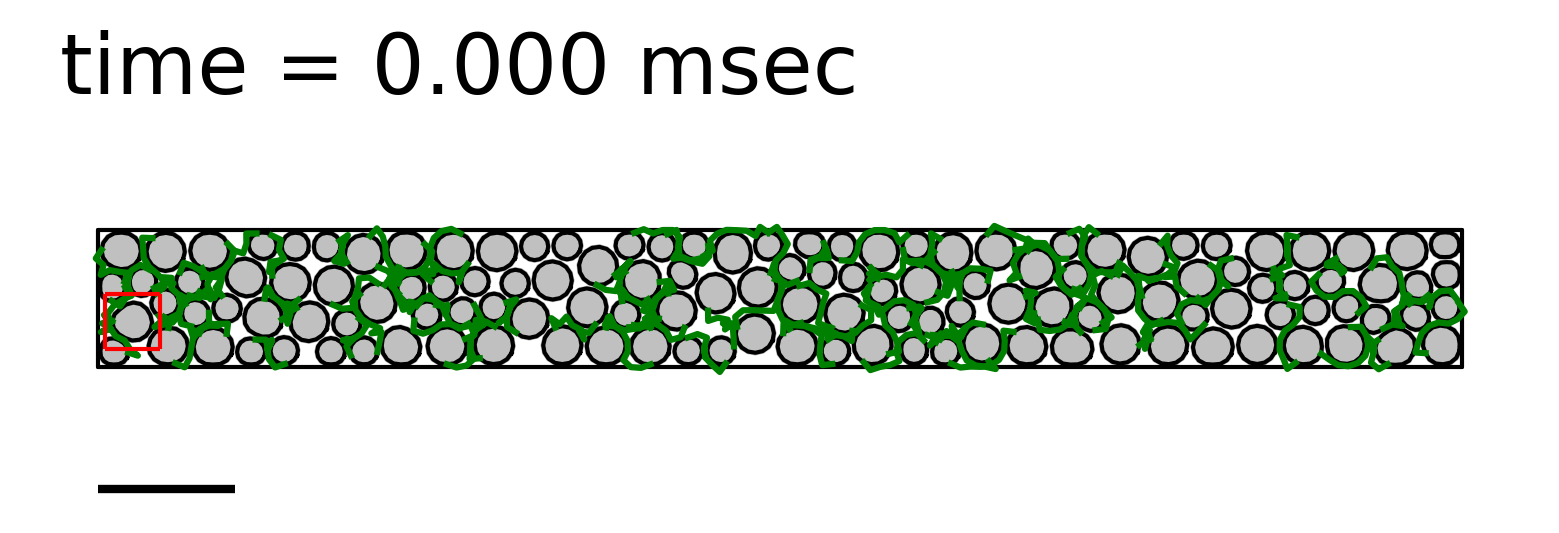

In [100]:
sns.reset_orig()
seed = 60
CF_sys = rsssbcv.Soft_and_Filament(Nc = 130, Nv = 16, Nf = 100, 
                               random_init = True, mLf = 6.4,
    periodic_bc = False, full_repulsion = True, seed = seed)

filename = ('/Volumes/RayLab01/soft_particle_simulation_incorp/18Aug/lowVis/'
            +'SimResults_Nc_130_Nv_16_Np_10_Nf_100_volfracAct_0.79_volfrac_0.6_filfrac_0.27_solver_bdf_mLf4.8_soft_ERbreak_lowVis_constantF_VarC_25.45_seed1_18Aug/'+
            'SimResults_0000.hdf5')
CF_sys.load_data(filename)
CF_sys.change_r_expanded(CF_sys.R[:, 0].flatten())
CF_sys.get_separation_vectors()
CF_sys.plot_system(lw = 1)
plt.gcf().set_dpi(300)
plt.axis('off')
ax = plt.gca()
time_text = ax.text(0.02, 1, '', transform=ax.transAxes, fontsize = 20)
time_text.set_text('')
t = CF_sys.Time[0]/CF_sys.T_contr*5 # unit: msec
time_text.set_text('time = {:.3f} msec'.format(t))
plt.xlim([-55, 55])
plt.ylim([-15, 15])
plt.hlines(-14, -50, -40, color = 'black', linewidth = 2)

j = 32
x_j, y_j = CF_sys.r_center_matrix[j,:]
size_window = 2
plt.hlines(y_j-size_window, x_j-size_window, x_j+size_window, color = 'red', lw = 1, zorder=10)
plt.hlines(y_j+size_window, x_j-size_window, x_j+size_window, color = 'red', lw = 1, zorder=11)
plt.vlines(x_j-size_window, y_j-size_window, y_j+size_window, color = 'red', lw = 1, zorder=12)
plt.vlines(x_j+size_window, y_j-size_window, y_j+size_window, color = 'red', lw = 1, zorder=13)

plt.savefig('Nc130_Nf100_mLf4.8_18Aug_t0msec_mark32.png', dpi = 400, bbox_inches='tight')

Loading Simulation data from disk .......
Loading hdf5 file


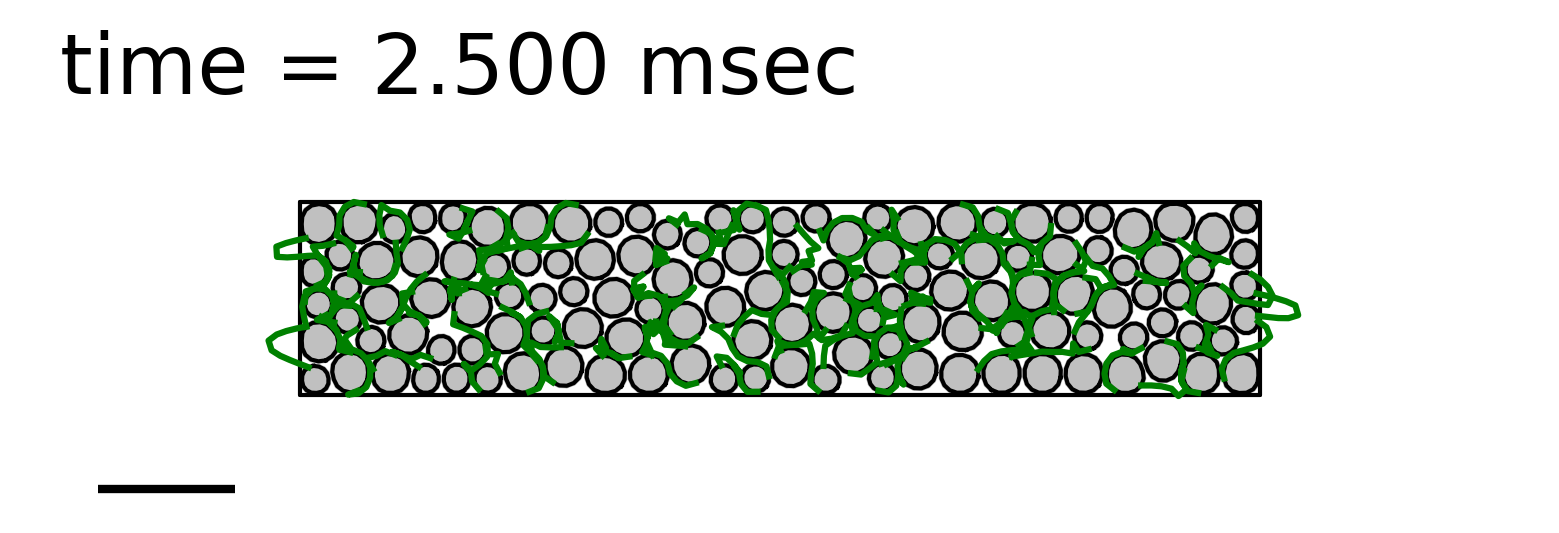

In [87]:
sns.reset_orig()
seed = 60
CF_sys = rsssbcv.Soft_and_Filament(Nc = 130, Nv = 16, Nf = 100, 
                               random_init = True, mLf = 6.4,
    periodic_bc = False, full_repulsion = True, seed = seed)

filename = ('/Volumes/RayLab01/soft_particle_simulation_incorp/18Aug/lowVis/'
            +'SimResults_Nc_130_Nv_16_Np_10_Nf_100_volfracAct_0.79_volfrac_0.6_filfrac_0.27_solver_bdf_mLf4.8_soft_ERbreak_lowVis_constantF_VarC_25.45_seed1_18Aug/'+
            'SimResults_3124.hdf5')
CF_sys.load_data(filename)
CF_sys.change_r_expanded(CF_sys.R[:, 0].flatten())
CF_sys.get_separation_vectors()
CF_sys.plot_system(lw = 1)
plt.gcf().set_dpi(300)
plt.axis('off')
ax = plt.gca()
time_text = ax.text(0.02, 1, '', transform=ax.transAxes, fontsize = 20)
time_text.set_text('')
t = CF_sys.Time[0]/CF_sys.T_contr*5 # unit: msec
time_text.set_text('time = {:.3f} msec'.format(t))
plt.xlim([-55, 55])
plt.ylim([-15, 15])
plt.hlines(-14, -50, -40, color = 'black', linewidth = 2)
plt.savefig('Nc130_Nf100_mLf4.8_18Aug_t2.5msec.png', dpi = 400, bbox_inches='tight')

Loading Simulation data from disk .......
Loading hdf5 file


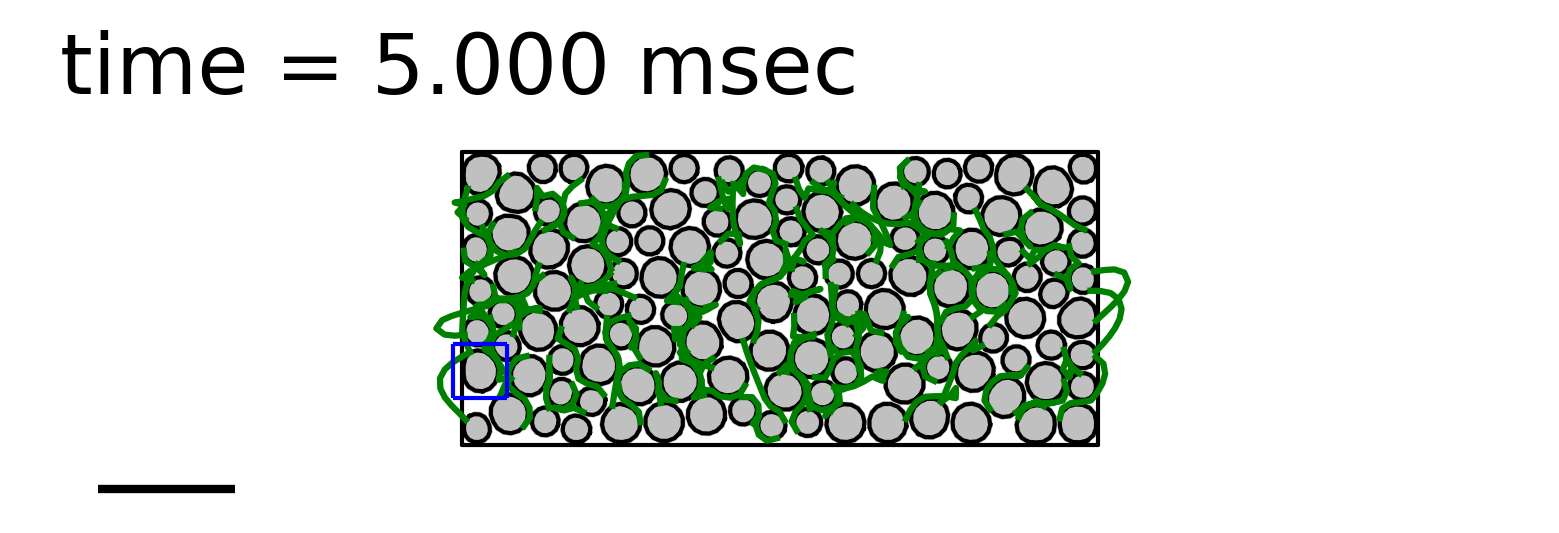

In [99]:
sns.reset_orig()
seed = 60
CF_sys = rsssbcv.Soft_and_Filament(Nc = 130, Nv = 16, Nf = 100, 
                               random_init = True, mLf = 6.4,
    periodic_bc = False, full_repulsion = True, seed = seed)

filename = ('/Volumes/RayLab01/soft_particle_simulation_incorp/18Aug/lowVis/'
            +'SimResults_Nc_130_Nv_16_Np_10_Nf_100_volfracAct_0.79_volfrac_0.6_filfrac_0.27_solver_bdf_mLf4.8_soft_ERbreak_lowVis_constantF_VarC_25.45_seed1_18Aug/'+
            'SimResults_6248.hdf5')
CF_sys.load_data(filename)
CF_sys.change_r_expanded(CF_sys.R[:, -1].flatten())
CF_sys.get_separation_vectors()
CF_sys.plot_system(lw = 1)
plt.gcf().set_dpi(300)
plt.axis('off')
ax = plt.gca()
time_text = ax.text(0.02, 1, '', transform=ax.transAxes, fontsize = 20)
time_text.set_text('')
t = CF_sys.Time[-1]/CF_sys.T_contr*5 # unit: msec
time_text.set_text('time = {:.3f} msec'.format(t))
plt.xlim([-55, 55])
plt.ylim([-15, 15])
plt.hlines(-14, -50, -40, color = 'black', linewidth = 2)

j = 32
x_j, y_j = CF_sys.r_center_matrix[j,:]
size_window = 2
plt.hlines(y_j-size_window, x_j-size_window, x_j+size_window, color = 'blue', lw = 1, zorder=10)
plt.hlines(y_j+size_window, x_j-size_window, x_j+size_window, color = 'blue', lw = 1, zorder=11)
plt.vlines(x_j-size_window, y_j-size_window, y_j+size_window, color = 'blue', lw = 1, zorder=12)
plt.vlines(x_j+size_window, y_j-size_window, y_j+size_window, color = 'blue', lw = 1, zorder=13)

plt.savefig('Nc130_Nf100_mLf4.8_18Aug_t5msec_mark32.png', dpi = 400, bbox_inches='tight')

Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file


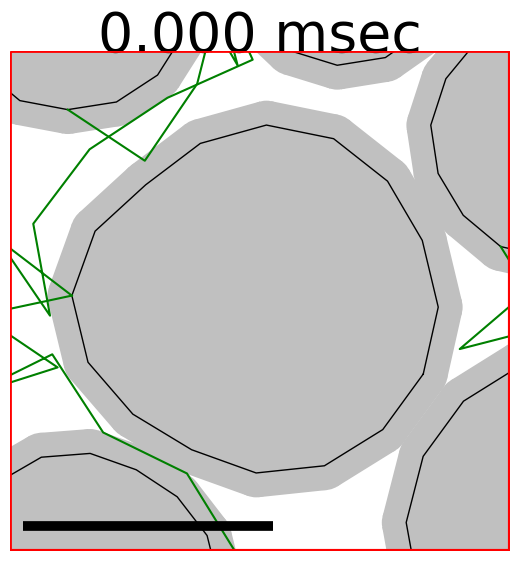

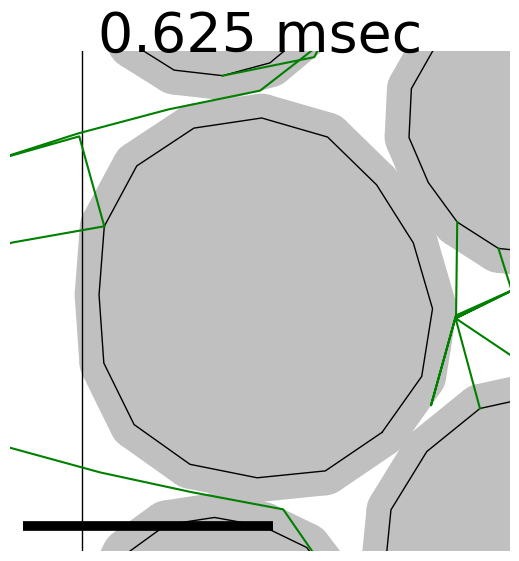

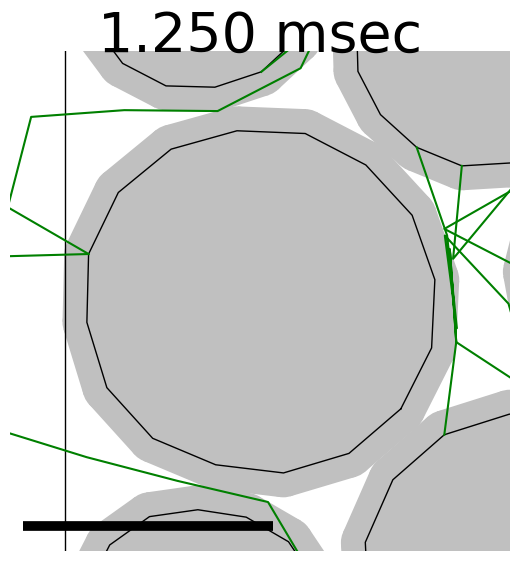

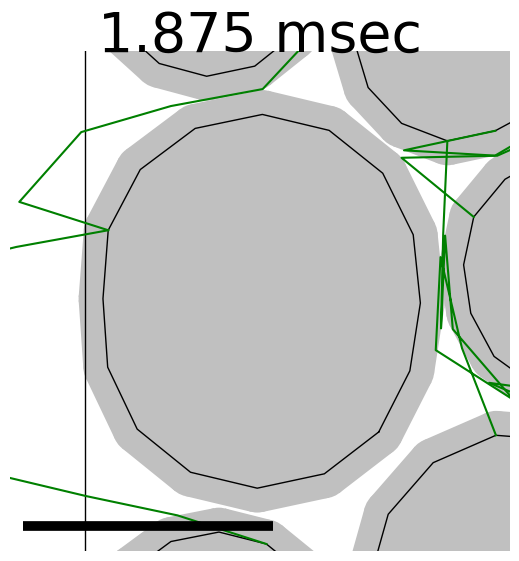

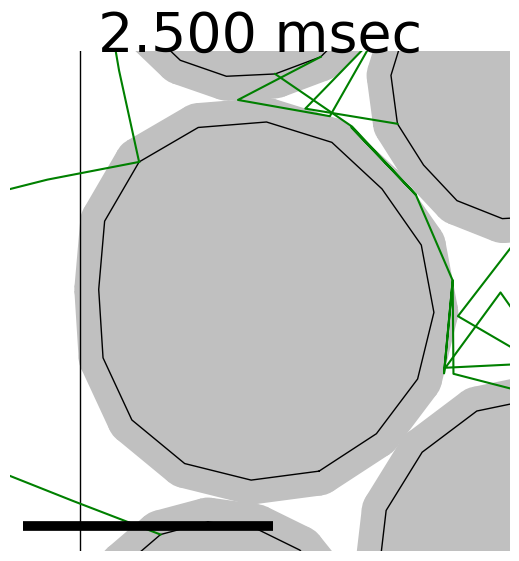

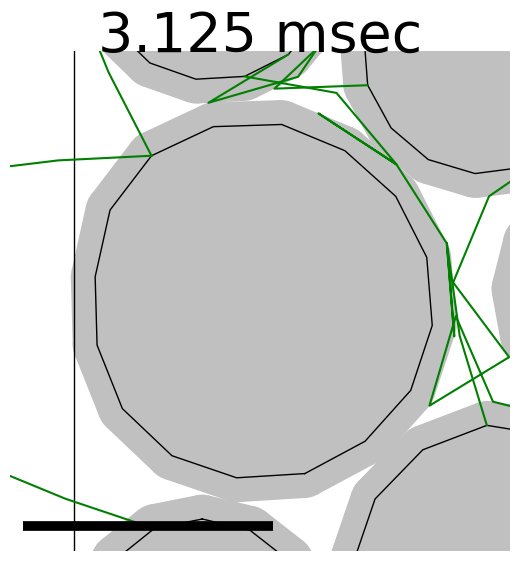

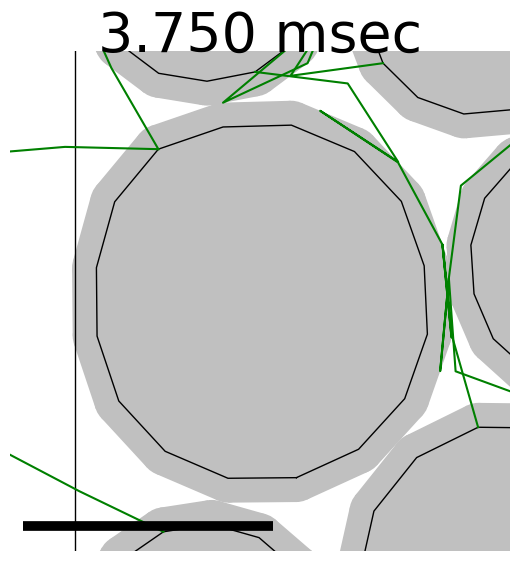

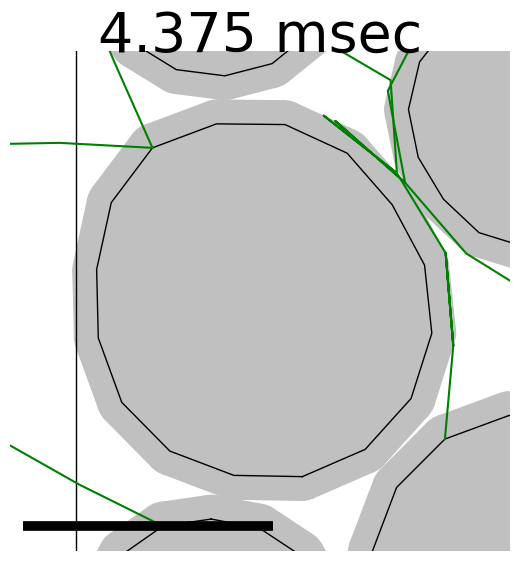

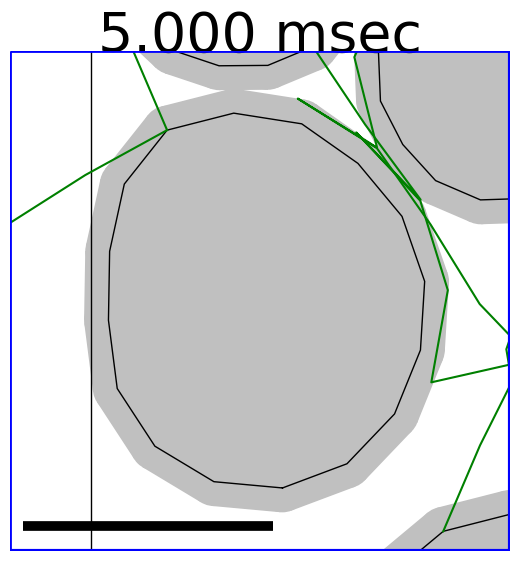

In [98]:
j = 32
sns.reset_orig()
seed = 60
CF_sys = rsssbcv.Soft_and_Filament(Nc = 130, Nv = 16, Nf = 100, 
                               random_init = True, mLf = 6.4,
    periodic_bc = False, full_repulsion = True, seed = seed)

#for copy_number in [0, 499, 999, 1499, 1999, 2499, 2999, 3499, 3999]:
for copy_number in [0, 779, 1561, 2342, 3123, 3904, 4685, 5467, 6248]:
    filename = ('/Volumes/RayLab01/soft_particle_simulation_incorp/18Aug/lowVis/'
                +'SimResults_Nc_130_Nv_16_Np_10_Nf_100_volfracAct_0.79_volfrac_0.6_filfrac_0.27_solver_bdf_mLf4.8_soft_ERbreak_lowVis_constantF_VarC_25.45_seed1_18Aug/'+
                'SimResults_{0:04d}.hdf5'.format(copy_number))
    CF_sys.load_data(filename)
    if copy_number == 0:
        CF_sys.change_r_expanded(CF_sys.R[:, 0].flatten())
    else:
        CF_sys.change_r_expanded(CF_sys.R[:, -1].flatten())
    CF_sys.get_separation_vectors()
    CF_sys.plot_system(lw = 1)
    plt.gcf().set_dpi(100)
    plt.axis('off')
    ax = plt.gca()
    time_text = ax.text(0.5, 1, '', transform=ax.transAxes, fontsize = 40, ha='center')
    time_text.set_text('')
    if copy_number == 0:
        t = CF_sys.Time[0]/CF_sys.T_contr*5 # unit: msec
        time_text.set_text('{:.3f} msec'.format(t))
    else:
        t = CF_sys.Time[-1]/CF_sys.T_contr*5 # unit: msec
        time_text.set_text('{:.3f} msec'.format(t))
    x_j, y_j = CF_sys.r_center_matrix[j,:]
    size_window = 2
    plt.xlim([x_j-size_window, x_j+size_window])
    plt.ylim([y_j-size_window, y_j+size_window])
    plt.hlines(y_j-size_window+0.2, x_j-size_window+0.1, x_j-size_window+2+0.1, color = 'black', linewidth = 7, zorder=9)
    if copy_number == 0:
        plt.hlines(y_j-size_window, x_j-size_window, x_j+size_window, color = 'red', lw = 3, zorder=10)
        plt.hlines(y_j+size_window, x_j-size_window, x_j+size_window, color = 'red', lw = 2, zorder=11)
        plt.vlines(x_j-size_window, y_j-size_window, y_j+size_window, color = 'red', lw = 2, zorder=12)
        plt.vlines(x_j+size_window, y_j-size_window, y_j+size_window, color = 'red', lw = 3, zorder=13)
    elif copy_number == 6248:
        plt.hlines(y_j-size_window, x_j-size_window, x_j+size_window, color = 'blue', lw = 3, zorder=10)
        plt.hlines(y_j+size_window, x_j-size_window, x_j+size_window, color = 'blue', lw = 2, zorder=11)
        plt.vlines(x_j-size_window, y_j-size_window, y_j+size_window, color = 'blue', lw = 2, zorder=12)
        plt.vlines(x_j+size_window, y_j-size_window, y_j+size_window, color = 'blue', lw = 3, zorder=13)
    plt.savefig('Nc130_Nf100_mLf4.8_18Aug_t_{:.3f}msec.png'.format(t), dpi = 400, bbox_inches='tight')

## Fig 4

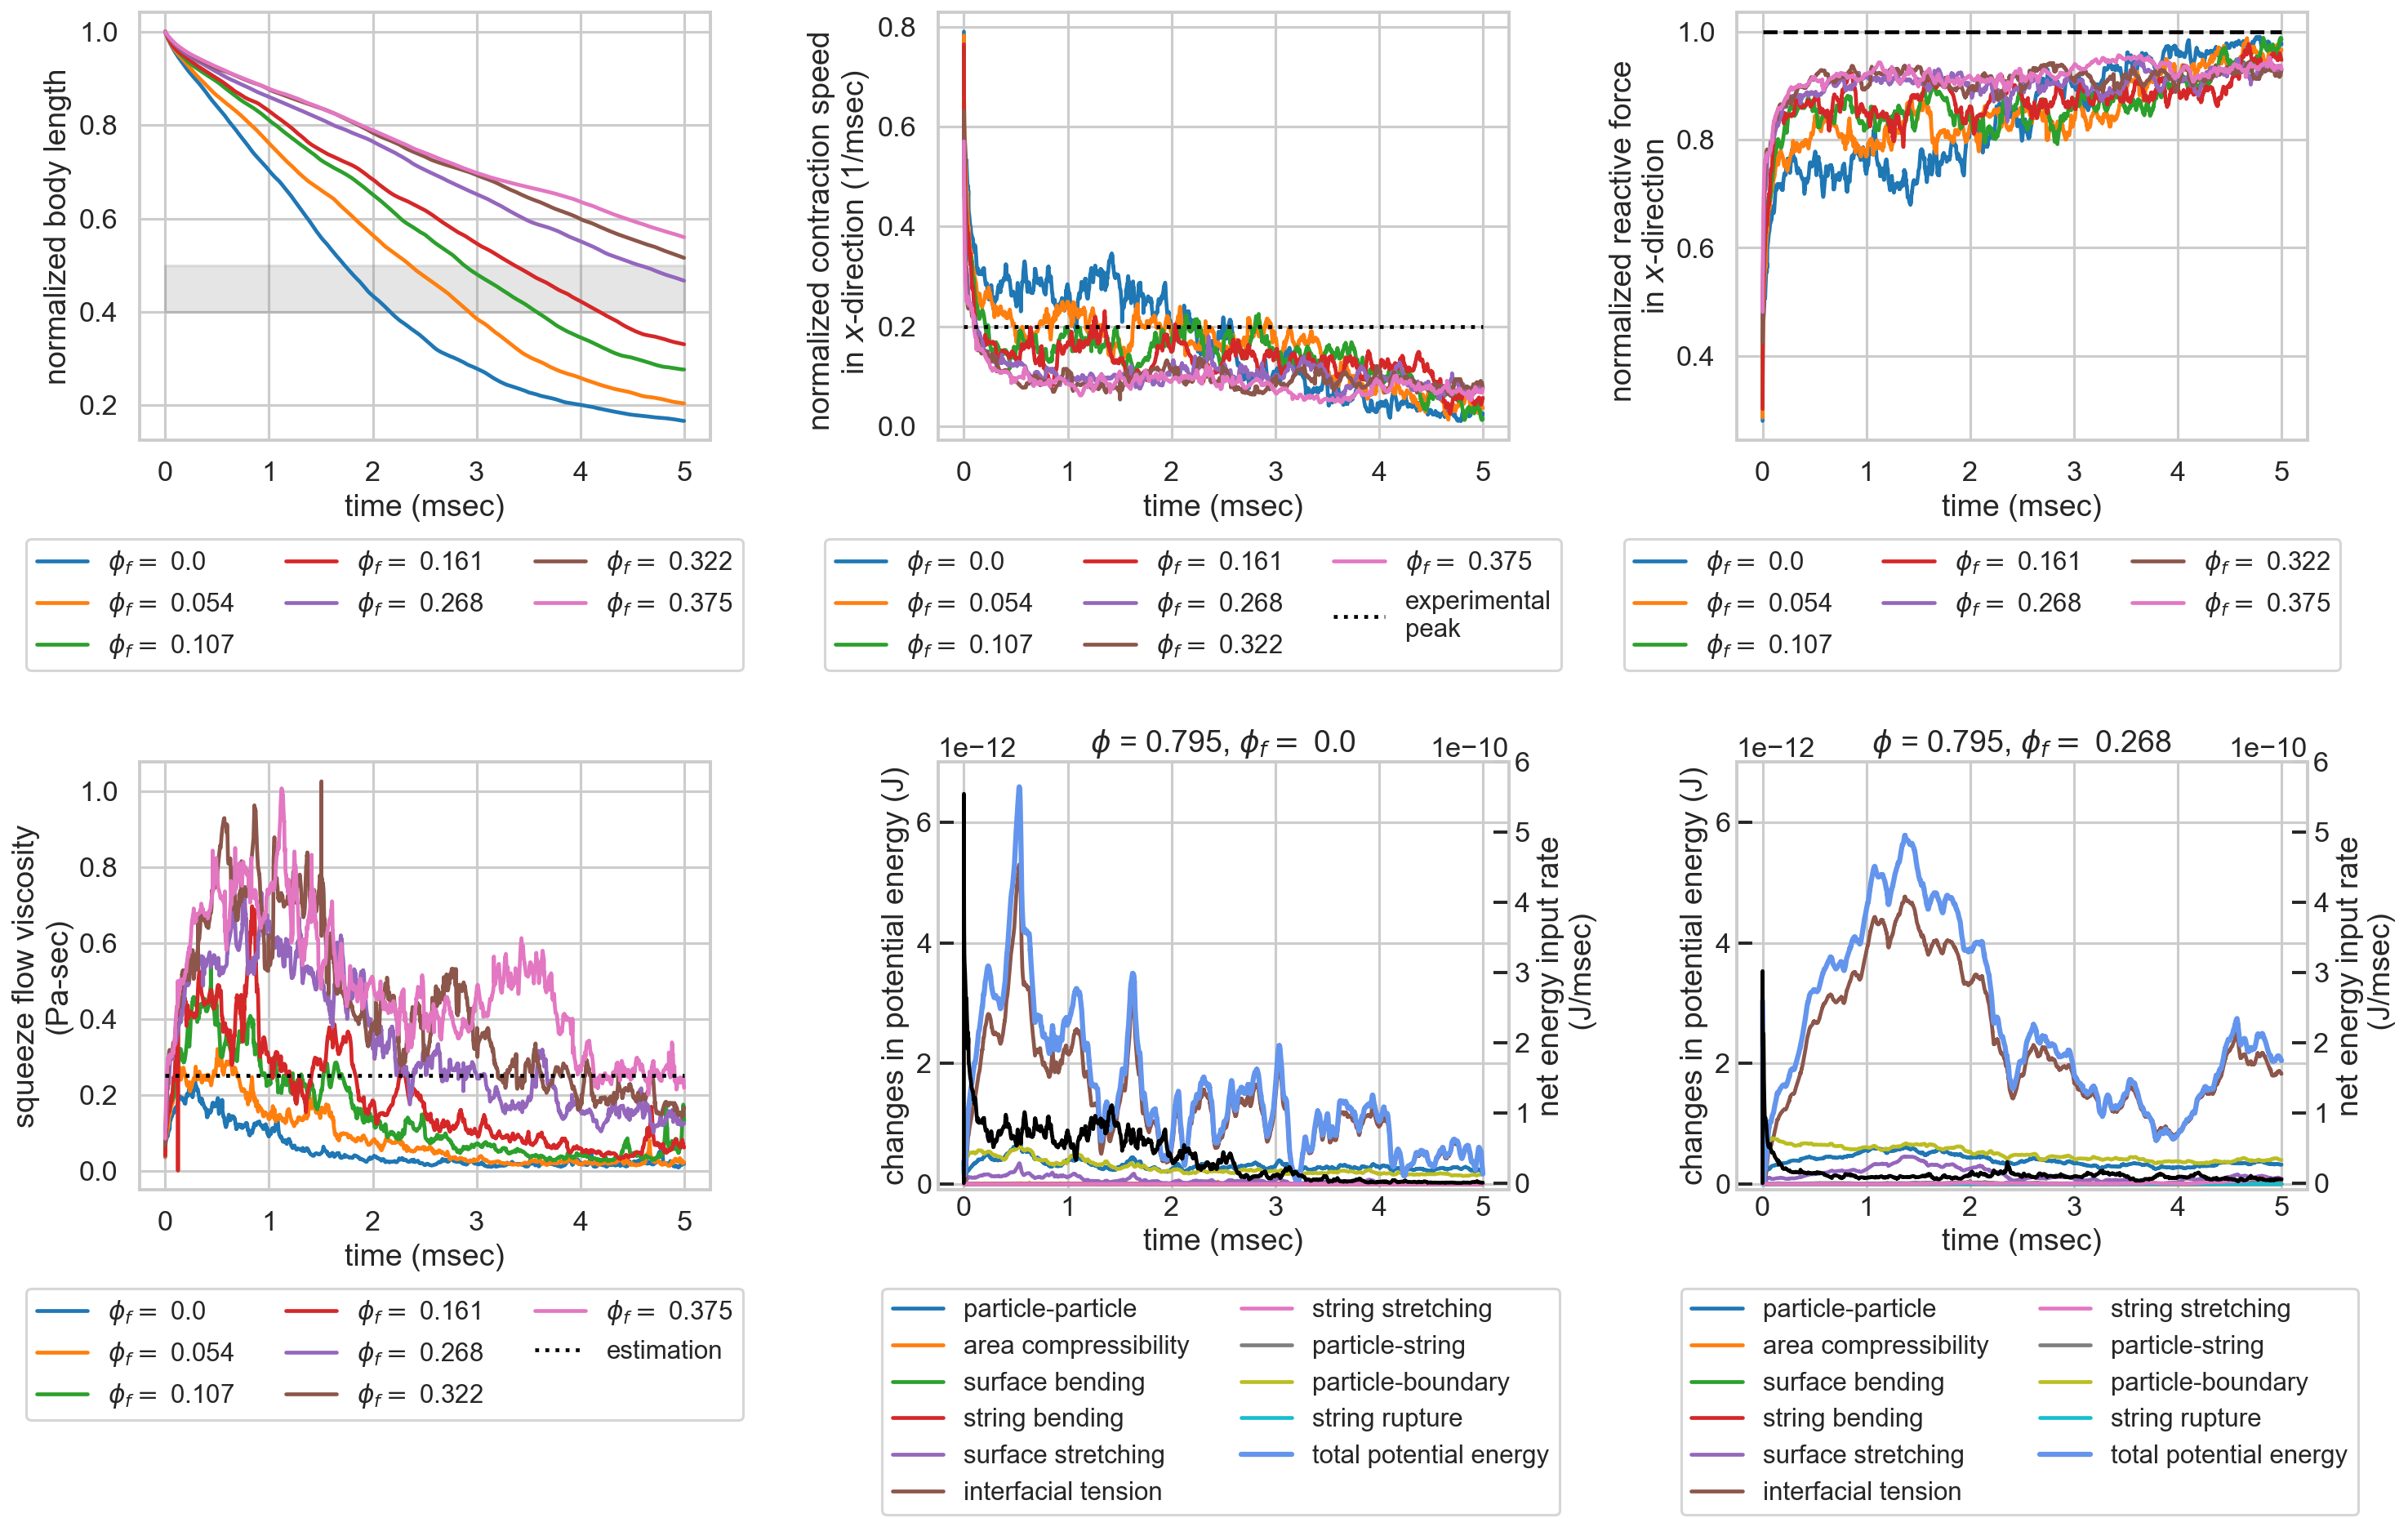

In [24]:
summarized = summarized_Nc130_lowVis_mLf48
E_conv = summarized['E_conv_all'][0]

plt.figure(dpi = 150, figsize=(20,13))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.subplot(2,3,1)
summarized = summarized_Nc130_lowVis_mLf48
id_list = [0,4,5,6,1,2,3]
for ids in id_list:
    plt.plot(summarized['t_ms_all'][ids], summarized['shrinkage_all'][ids], label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3))
plt.gca().fill_between([0,5], 0.4, 0.5, alpha = 0.2, color = 'gray')
plt.legend(ncol=3, bbox_to_anchor=(-0.22, -0.20), loc='upper left', fontsize = 15)
plt.xlabel('time (msec)')
plt.ylabel('normalized body length')

plt.subplot(2,3,2)
summarized = summarized_Nc130_lowVis_mLf48
id_list = [0,4,5,6,1,2,3]
for ids in id_list:
    plt.plot(summarized['t_ms_all'][ids], summarized['shrinkage_rate_ms_all'][ids], label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3))
plt.hlines(0.2, 0, 5, linestyle = 'dotted', color = 'black', label = 'experimental\npeak', zorder = 11)
plt.legend(ncol=3, bbox_to_anchor=(-0.22, -0.20), loc='upper left', fontsize = 15)
plt.xlabel('time (msec)')
plt.ylabel('normalized contraction speed \n in '+r'$x$'+'-direction (1/msec)')

plt.subplot(2,3,3)
summarized = summarized_Nc130_lowVis_mLf48
id_list = [0,4,5,6,1,2,3]
for ids in id_list:
    plt.plot(summarized['t_ms_all'][ids], summarized['normalized_Fx_arr_all'][ids], label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3))
plt.legend(ncol=3, bbox_to_anchor=(-0.22, -0.20), loc='upper left', fontsize = 15)
plt.hlines(1, 0, 5, color = 'black', linestyle = '--')
plt.xlabel('time (msec)')
plt.ylabel('normalized reactive force \nin '+r'$x$'+'-direction')

plt.subplot(2,3,4)
summarized = summarized_Nc130_lowVis_mLf48
id_list = [0,4,5,6,1,2,3]
for ids in id_list:
    plt.plot(summarized['t_ms_all'][ids], summarized['G_eta_all'][ids], label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3))
plt.hlines(0.25, 0, 5, linestyle = 'dotted', color = 'black', label = 'estimation', zorder = 11)
plt.legend(ncol=3, bbox_to_anchor=(-0.22, -0.20), loc='upper left', fontsize = 15)
plt.xlabel('time (msec)')
plt.ylabel('squeeze flow viscosity\n(Pa-sec)')

plt.subplot(2,3,5)
summarized = summarized_Nc130_lowVis_mLf48
j = 0
ER_break_threshold = 1.015
sac_bond_each = E_conv*1/2*CF_sys.kl*((ER_break_threshold-1)*CF_sys.dLf)**2
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*summarized['Urep_arr_all'][j], label = 'particle-particle')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ua_arr_all'][j]-np.min(summarized['Ua_arr_all'][j])), label = 'area compressibility')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ub_arr_all'][j]-np.min(summarized['Ub_arr_all'][j])), label = 'surface bending')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ubf_arr_all'][j]-np.min(summarized['Ubf_arr_all'][j])), label = 'string bending')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ulc_arr_all'][j]-np.min(summarized['Ulc_arr_all'][j])), label = 'surface stretching')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ugamma_arr_all'][j]-np.min(summarized['Ugamma_arr_all'][j])), label = 'interfacial tension')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ul_arr_all'][j]-np.min(summarized['Ul_arr_all'][j])), label = 'string stretching', zorder = 10)
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ur_arr_all'][j]-np.min(summarized['Ur_arr_all'][j])), label = 'particle-string')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*summarized['Urb_arr_all'][j], label = 'particle-boundary')
plt.plot(summarized['t_ms_all'][j], (1-summarized['ERintact_all'][j])*(summarized['Nf_all'][j])*sac_bond_each, label = 'string rupture')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['U_total_arr_all'][j]-np.min(summarized['U_total_arr_all'][j])), 
         label = 'total potential energy', color = 'cornflowerblue', lw = 3)
plt.legend(loc='upper left', bbox_to_anchor = (-0.12,-0.2), ncol = 2, fontsize = 15)
plt.xlabel('time (msec)')
plt.ylabel('changes in potential energy (J)')
plt.ylim([-0.1E-12, 7E-12])
plt.gca().tick_params(axis='both', direction = 'in')
ax2 = plt.gca().twinx()
t_ms =summarized['t_ms_all'][j]
ax2.plot(np.hstack([0, summarized['t_ms_all'][j][1:]]), 
         np.hstack([0, (
             summarized['E_conv_all'][j]*summarized['Lx0_all'][j]*
             (summarized['shrinkage_all'][j][:-1] - summarized['shrinkage_all'][j][1:])*
             (summarized['boundary_forces_all'][j] - summarized['Fx_arr_all'][j][:-1]))/(t_ms[1:] - t_ms[0:-1])])
         , label = 'net energy input', color = 'black')
ax2.set_ylabel('net energy input rate\n (J/msec)')
ax2.tick_params(axis='both', direction = 'in')
ax2.set_ylim([-0.1E-10, 6E-10])
plt.grid(b=None)
plt.title(r'$\phi$ = 0.795, '+r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][j],3))

plt.subplot(2,3,6)
j = 1
ER_break_threshold = 1.015
sac_bond_each = E_conv*1/2*CF_sys.kl*((ER_break_threshold-1)*CF_sys.dLf)**2

plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*summarized['Urep_arr_all'][j], label = 'particle-particle')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ua_arr_all'][j]-np.min(summarized['Ua_arr_all'][j])), label = 'area compressibility')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ub_arr_all'][j]-np.min(summarized['Ub_arr_all'][j])), label = 'surface bending')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ubf_arr_all'][j]-np.min(summarized['Ubf_arr_all'][j])), label = 'string bending')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ulc_arr_all'][j]-np.min(summarized['Ulc_arr_all'][j])), label = 'surface stretching')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ugamma_arr_all'][j]-np.min(summarized['Ugamma_arr_all'][j])), label = 'interfacial tension')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ul_arr_all'][j]-np.min(summarized['Ul_arr_all'][j])), label = 'string stretching', zorder = 10)
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ur_arr_all'][j]-np.min(summarized['Ur_arr_all'][j])), label = 'particle-string')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*summarized['Urb_arr_all'][j], label = 'particle-boundary')
plt.plot(summarized['t_ms_all'][j], (1-summarized['ERintact_all'][j])*(summarized['Nf_all'][j])*sac_bond_each, label = 'string rupture')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['U_total_arr_all'][j]-np.min(summarized['U_total_arr_all'][j])), 
         label = 'total potential energy', color = 'cornflowerblue', lw = 3)
plt.legend(loc='upper left', bbox_to_anchor = (-0.12,-0.2), ncol = 2, fontsize = 15)
plt.xlabel('time (msec)')
plt.ylabel('changes in potential energy (J)')
plt.ylim([-0.1E-12, 7E-12])
plt.gca().tick_params(axis='both', direction = 'in')
ax2 = plt.gca().twinx()
t_ms =summarized['t_ms_all'][j]
ax2.plot(np.hstack([0, summarized['t_ms_all'][j][1:]]), 
         np.hstack([0, (
             summarized['E_conv_all'][j]*summarized['Lx0_all'][j]*
             (summarized['shrinkage_all'][j][:-1] - summarized['shrinkage_all'][j][1:])*
             (summarized['boundary_forces_all'][j] - summarized['Fx_arr_all'][j][:-1]))/(t_ms[1:] - t_ms[0:-1])])
         , label = 'net energy input', color = 'black')
ax2.set_ylabel('net energy input rate\n (J/msec)')
ax2.tick_params(axis='both', direction = 'in')
ax2.set_ylim([-0.1E-10, 6E-10])
plt.grid(b=None)
plt.title(r'$\phi$ = 0.795, '+r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][j],3))

plt.tight_layout()
plt.savefig('Nc130_Nfvar_mLf4.8_summary.png', dpi = 400, bbox_inches="tight")

## Fig 5A-C

Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
0.1956521739130435


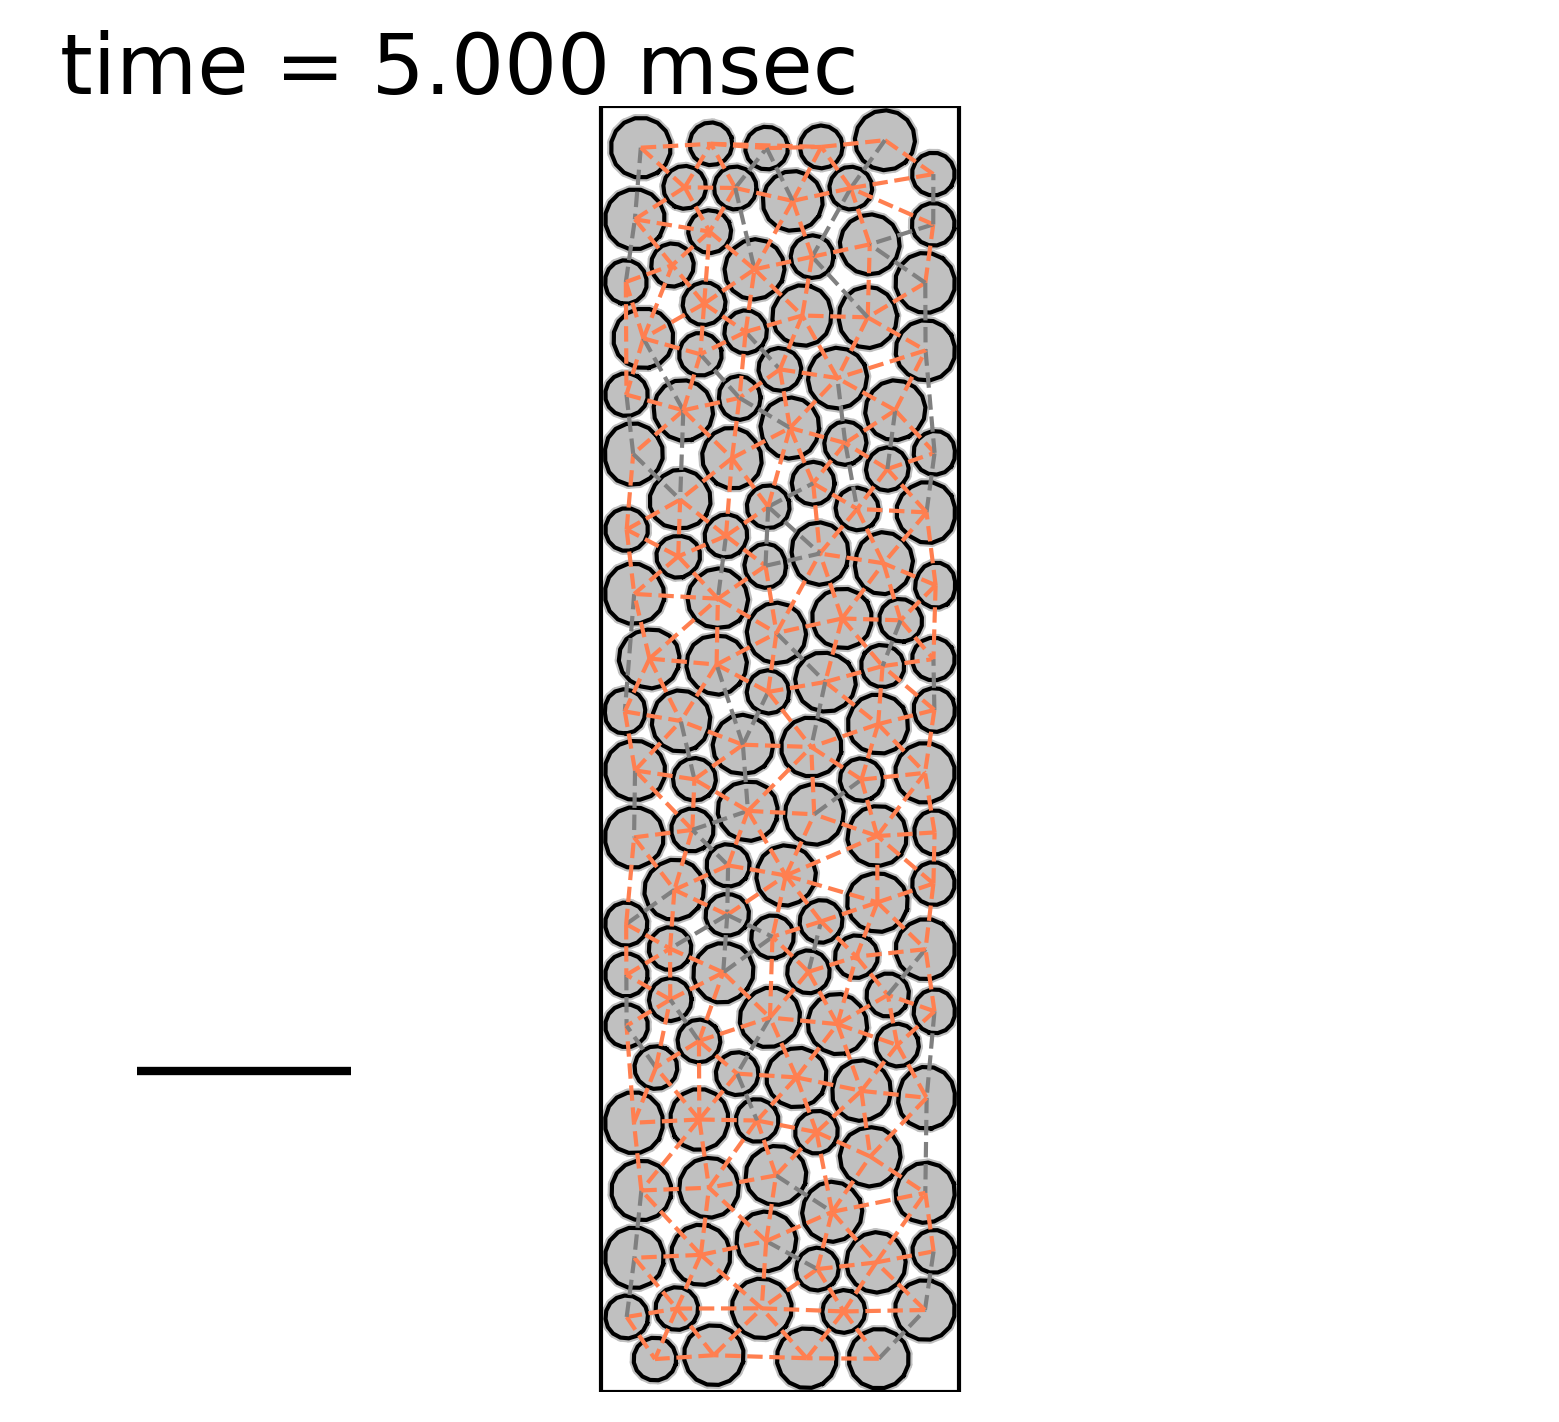

In [831]:
sns.reset_orig()
fd = 'SimResults_Nc_130_Nv_16_Np_10_Nf_0_volfracAct_0.79_volfrac_0.6_filfrac_0.0_solver_bdf_mLf4.8_soft_ERbreak_lowVis_constantF_VarC_25.45_seed1_18Aug'
list_dir = dic_combine_full[fd]
metadata_file = pd.read_csv(list_dir[0]+'/' + fd + '/' + 'metadata.csv')
CF_sys = rsssbcv.Soft_and_Filament(dim = int(metadata_file['Dimensions']),
                                      Nc = int(metadata_file['N colloids']),
                                      Nv = int(metadata_file['N vertices']),
                                      Nf = int(metadata_file['N filaments']),
                                      Np = int(metadata_file['N particles per filament']),
                                      Rc = float(metadata_file['baseline radius']), 
                                      bidisperse = float(metadata_file['bidisperse']),
                                      mLf = float(metadata_file['normalized length of strings']),
                                      v_char = float(metadata_file['v_char']),
                                      Ca = float(metadata_file['Ca']),
                                      St = float(metadata_file['St']),
                                      Re_R = float(metadata_file['Re_R']),
                                      Stk = float(metadata_file['Stk']),
                                      K1 = float(metadata_file['K1']),
                                      K2_pos = float(metadata_file['K2_pos']),
                                      K2_neg = float(metadata_file['K2_neg']),
                                      K3 = float(metadata_file['K3']),
                                      K4 = float(metadata_file['K4']),
                                      kr_b = float(metadata_file['repulsive constant from wall']), 
                                      kr_bf = float(metadata_file['kr_bf']),
                                      rho = float(metadata_file['rho']),
                                      seed = int(metadata_file['Seed']),
                                      random_init = True,
                                      periodic_bc = metadata_file['periodic boundary'][0],
                                      full_repulsion = metadata_file['full repulsion'][0],
                                      Aspect_ratio = float(metadata_file['Aspect_ratio']),
                                      Length_radius_ratio = float(metadata_file['Length_radius_ratio']), 
                                           viscous_ratio = float(metadata_file['viscous_ratio']))
# original
filename = list_dir[0]+'/' + fd + '/' + 'SimResults_0000.hdf5'
CF_sys.load_data(filename)
CF_sys.change_r_expanded(CF_sys.R[:, 0].flatten())
CF_sys.get_separation_vectors()
rp_original = CF_sys.compute_ridge_point()

# new
list_of_files = np.sort(os.listdir(list_dir[-1]+'/' + fd + '/'))
last_file = max(list_of_files,key=extract_number)
filename = list_dir[-1]+'/' + fd + '/' + last_file 
CF_sys.load_data(filename)
CF_sys.change_r_expanded(CF_sys.R[:, -1].flatten())
CF_sys.get_separation_vectors()

CF_sys.plot_system(lw = 1)
rp = CF_sys.compute_ridge_point()
preserved_fraction = rsssh.compare_ridge_points(rp_original, rp)
print(preserved_fraction)
for pair in rp:
    if pair in rp_original:
        plt.plot([CF_sys.r_center_matrix[pair[0], 0], CF_sys.r_center_matrix[pair[1], 0]], 
                 [CF_sys.r_center_matrix[pair[0], 1], CF_sys.r_center_matrix[pair[1], 1]], color = 'gray', linestyle = '--', lw = 1)
    else:
        plt.plot([CF_sys.r_center_matrix[pair[0], 0], CF_sys.r_center_matrix[pair[1], 0]], 
                 [CF_sys.r_center_matrix[pair[0], 1], CF_sys.r_center_matrix[pair[1], 1]], color = 'coral', linestyle = '--', lw = 1)
plt.axis('off')
ax = plt.gca()
plt.gcf().set_dpi(300)
time_text = ax.text(0.02, 1.01, '', transform=ax.transAxes, fontsize = 20)
time_text.set_text('')
t = CF_sys.Time[-1]/CF_sys.T_contr*5 # unit: msec
time_text.set_text('time = {:.3f} msec'.format(t))
plt.xlim([-35, 35])
plt.ylim([-30, 30])
plt.hlines(-15, -30, -20, color = 'black', linewidth = 2)
plt.savefig('Nc130_Nf0_t5msec_neighbor_pf19.6%.png', dpi = 400, bbox_inches="tight")

Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
0.5401234567901234


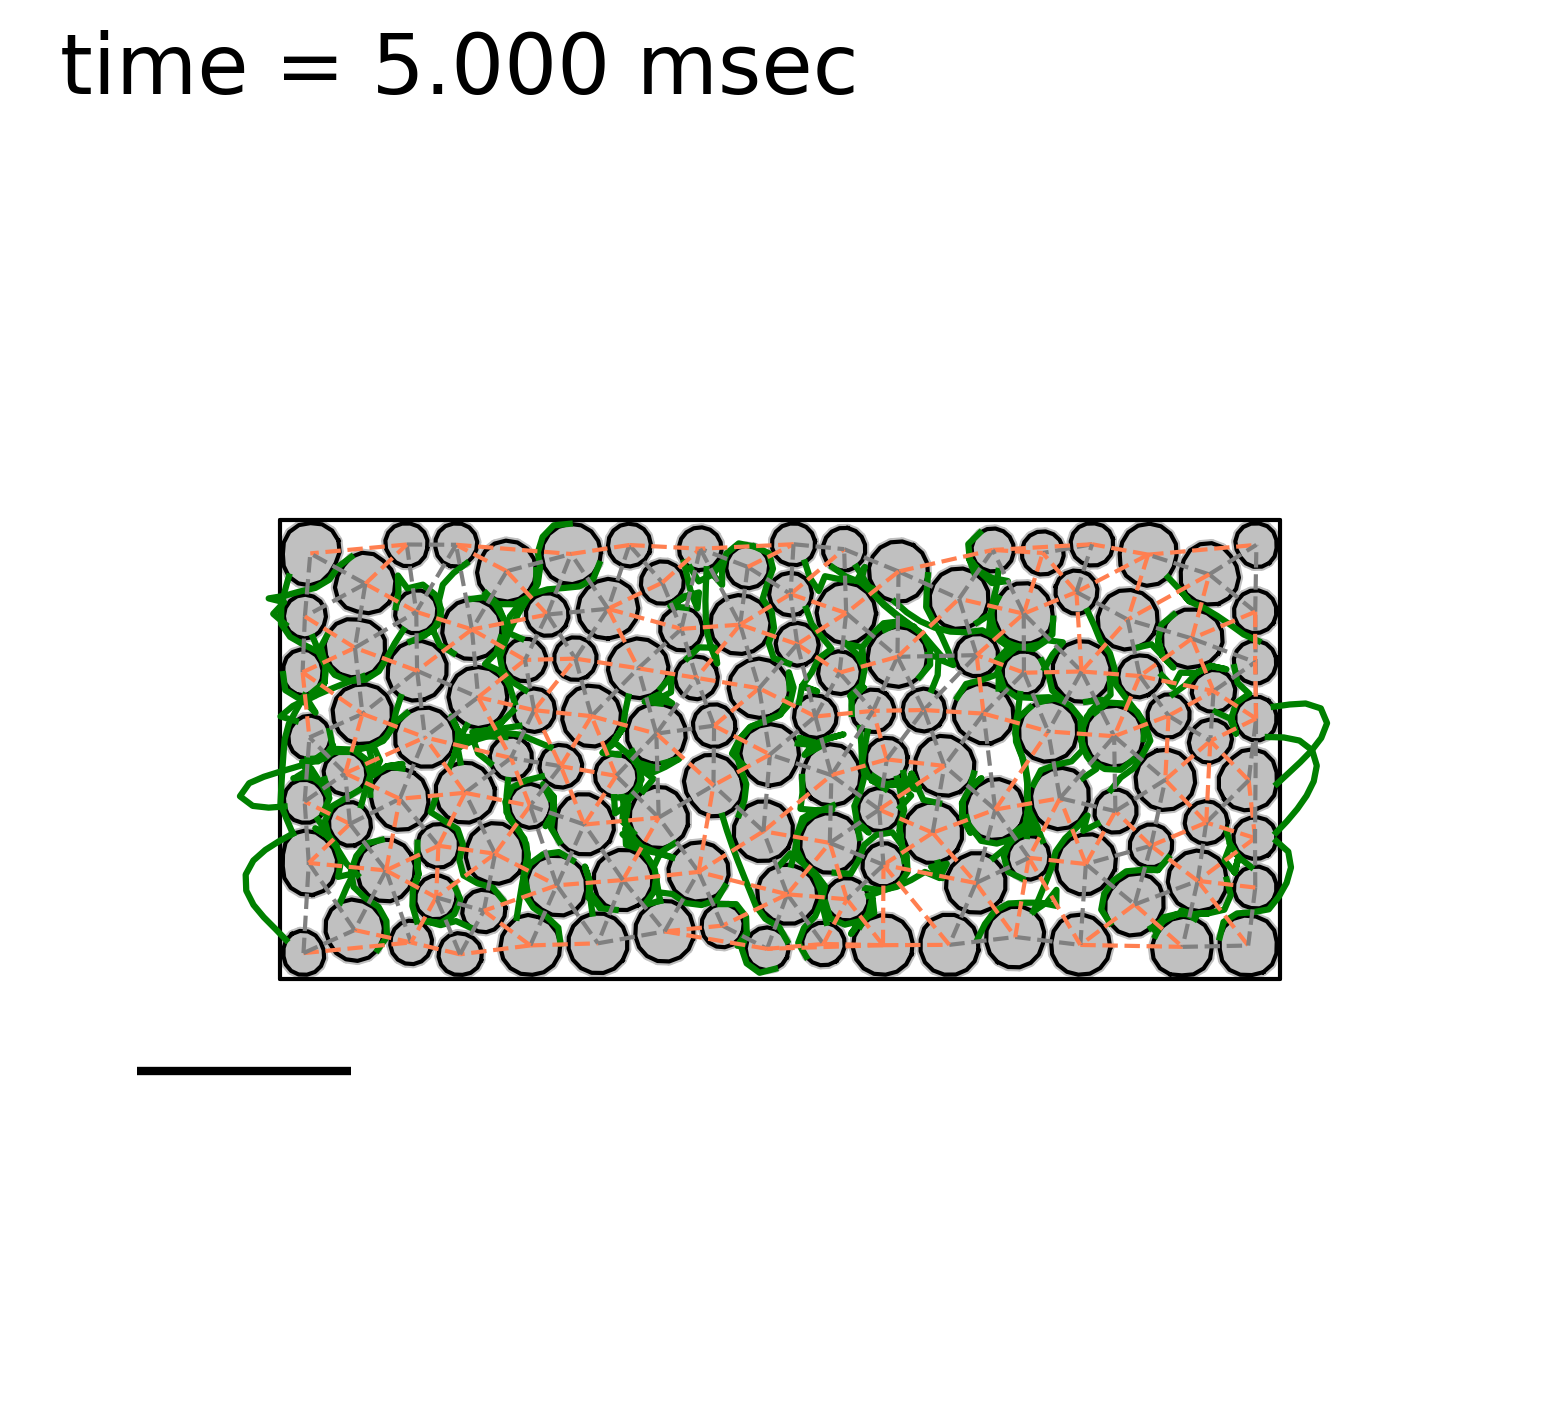

In [74]:
sns.reset_orig()
fd = 'SimResults_Nc_130_Nv_16_Np_10_Nf_100_volfracAct_0.79_volfrac_0.6_filfrac_0.27_solver_bdf_mLf4.8_soft_ERbreak_lowVis_constantF_VarC_25.45_seed1_18Aug'
list_dir = dic_combine_full[fd]
metadata_file = pd.read_csv(list_dir[0]+'/' + fd + '/' + 'metadata.csv')
CF_sys = rsssbcv.Soft_and_Filament(dim = int(metadata_file['Dimensions']),
                                      Nc = int(metadata_file['N colloids']),
                                      Nv = int(metadata_file['N vertices']),
                                      Nf = int(metadata_file['N filaments']),
                                      Np = int(metadata_file['N particles per filament']),
                                      Rc = float(metadata_file['baseline radius']), 
                                      bidisperse = float(metadata_file['bidisperse']),
                                      mLf = float(metadata_file['normalized length of strings']),
                                      v_char = float(metadata_file['v_char']),
                                      Ca = float(metadata_file['Ca']),
                                      St = float(metadata_file['St']),
                                      Re_R = float(metadata_file['Re_R']),
                                      Stk = float(metadata_file['Stk']),
                                      K1 = float(metadata_file['K1']),
                                      K2_pos = float(metadata_file['K2_pos']),
                                      K2_neg = float(metadata_file['K2_neg']),
                                      K3 = float(metadata_file['K3']),
                                      K4 = float(metadata_file['K4']),
                                      kr_b = float(metadata_file['repulsive constant from wall']), 
                                      kr_bf = float(metadata_file['kr_bf']),
                                      rho = float(metadata_file['rho']),
                                      seed = int(metadata_file['Seed']),
                                      random_init = True,
                                      periodic_bc = metadata_file['periodic boundary'][0],
                                      full_repulsion = metadata_file['full repulsion'][0],
                                      Aspect_ratio = float(metadata_file['Aspect_ratio']),
                                      Length_radius_ratio = float(metadata_file['Length_radius_ratio']), 
                                           viscous_ratio = float(metadata_file['viscous_ratio']))
# original
filename = list_dir[0]+'/' + fd + '/' + 'SimResults_0000.hdf5'
CF_sys.load_data(filename)
CF_sys.change_r_expanded(CF_sys.R[:, 0].flatten())
CF_sys.get_separation_vectors()
rp_original = CF_sys.compute_ridge_point()

# new
list_of_files = np.sort(os.listdir(list_dir[-1]+'/' + fd + '/'))
last_file = max(list_of_files,key=extract_number)
filename = list_dir[-1]+'/' + fd + '/' + last_file 
CF_sys.load_data(filename)
CF_sys.change_r_expanded(CF_sys.R[:, -1].flatten())
CF_sys.get_separation_vectors()

CF_sys.plot_system(lw = 1)
rp = CF_sys.compute_ridge_point()
preserved_fraction = rsssh.compare_ridge_points(rp_original, rp)
print(preserved_fraction)
for pair in rp:
    if pair in rp_original:
        plt.plot([CF_sys.r_center_matrix[pair[0], 0], CF_sys.r_center_matrix[pair[1], 0]], 
                 [CF_sys.r_center_matrix[pair[0], 1], CF_sys.r_center_matrix[pair[1], 1]], color = 'gray', linestyle = '--', lw = 1)
    else:
        plt.plot([CF_sys.r_center_matrix[pair[0], 0], CF_sys.r_center_matrix[pair[1], 0]], 
                 [CF_sys.r_center_matrix[pair[0], 1], CF_sys.r_center_matrix[pair[1], 1]], color = 'coral', linestyle = '--', lw = 1)
plt.axis('off')
ax = plt.gca()
plt.gcf().set_dpi(300)
time_text = ax.text(0.02, 1.01, '', transform=ax.transAxes, fontsize = 20)
time_text.set_text('')
t = CF_sys.Time[-1]/CF_sys.T_contr*5 # unit: msec
time_text.set_text('time = {:.3f} msec'.format(t))
plt.xlim([-35, 35])
plt.ylim([-30, 30])
plt.hlines(-15, -30, -20, color = 'black', linewidth = 2)
plt.savefig('Nc130_Nf100_mLf4.8_t5msec_neighbor_pf54.0%.png', dpi = 400, bbox_inches="tight")

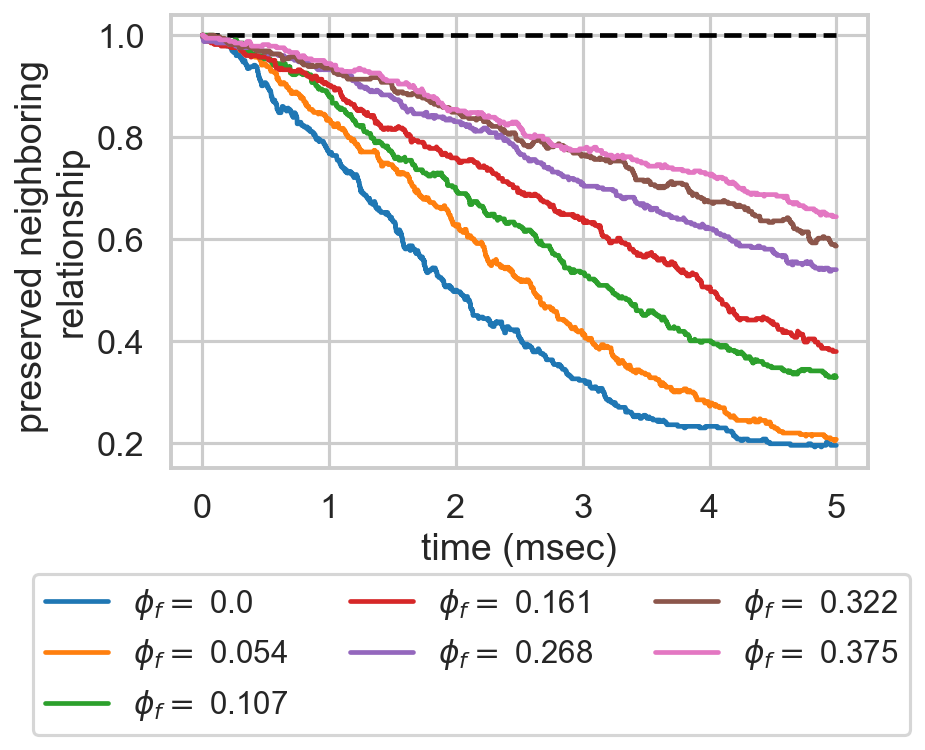

In [818]:
sns.set_context('talk')
sns.set_style('whitegrid')
plt.figure(dpi = 150)
summarized = summarized_Nc130_lowVis_mLf48
id_list = [0,4,5,6,1,2,3]
for ids in id_list:
    plt.plot(summarized['t_ms_all'][ids], summarized['preserved_fraction_arr_all'][ids], label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3))
plt.legend(ncol=3, bbox_to_anchor=(-0.22, -0.20), loc='upper left', fontsize = 15)
plt.hlines(1, 0, 5, color = 'black', linestyle = '--')
plt.xlabel('time (msec)')
plt.ylabel('preserved neighboring \nrelationship')
plt.savefig('Nc130_mLf4.8_preservedSpatial.png', dpi = 400, bbox_inches="tight")

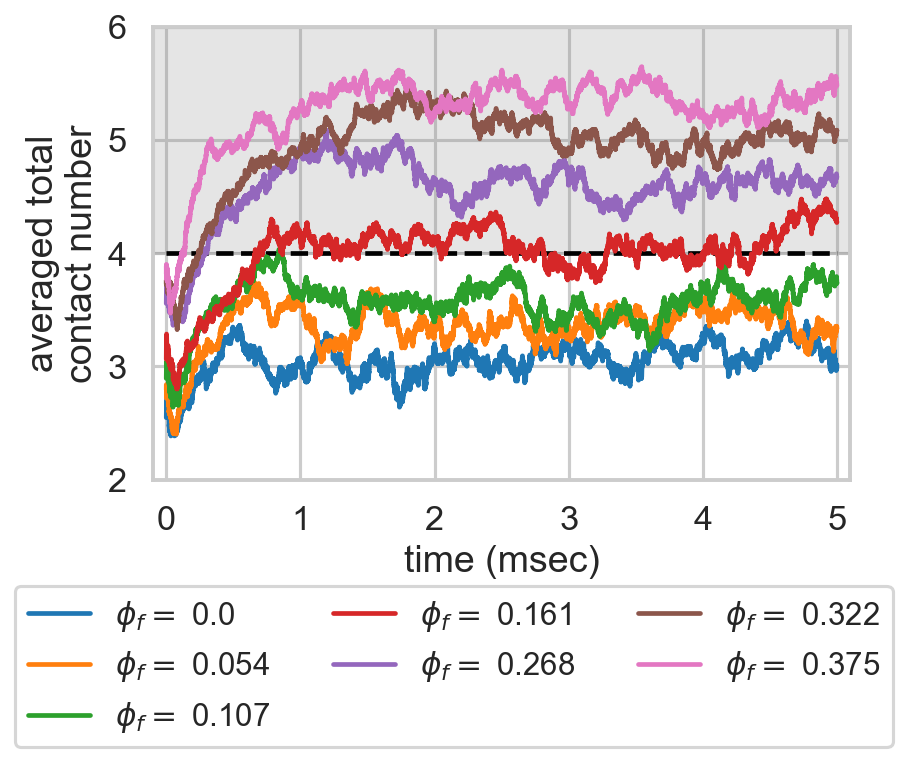

In [826]:
sns.set_context('talk')
sns.set_style('whitegrid')
plt.figure(dpi = 150)
summarized = summarized_Nc130_lowVis_mLf48
id_list = [0,4,5,6,1,2,3]
for ids in id_list:
    plt.plot(summarized['t_ms_all'][ids], summarized['z_total_arr_all'][ids], label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3))
plt.legend(ncol=3, bbox_to_anchor=(-0.22, -0.20), loc='upper left', fontsize = 15)
plt.hlines(4, 0, 5, color = 'black', linestyle = '--')
plt.xlabel('time (msec)')
plt.ylabel('averaged total\ncontact number')
plt.gca().fill_between([-0.1,5.1], 4, 6, alpha = 0.2, color = 'gray')
plt.xlim([-0.1,5.1])
plt.ylim([2,6])
plt.savefig('Nc130_mLf4.8_totalZ.png', dpi = 400, bbox_inches="tight")

## Fig S3

In [103]:
CF_sys2.simulate(Tf = 2, t0 = 0, method = 'bdf', save = True, Npts = 200, note = 'test_relaxation', use_odespy = True, atol = 1E-7, rtol = 1E-6, order = 5)


Param: 1128.2051282051284 Progress:   0%|          | 0/100 [00:00<?, ?it/s]
Param: 1128.2051282051284 Progress:   0%|          | 0.167479433950961/100 [00:00<00:44,  2.23it/s]

Running the filament simulation ....



Param: 1128.2051282051284 Progress:   0%|          | 0.32330293386854353/100 [00:00<00:50,  1.97it/s]
Param: 1128.2051282051284 Progress:   0%|          | 0.4738719145318352/100 [00:00<00:47,  2.09it/s] 
Param: 1128.2051282051284 Progress:   1%|          | 0.618650829509363/100 [00:00<00:48,  2.05it/s] 
Param: 1128.2051282051284 Progress:   1%|          | 0.765142002684316/100 [00:01<02:10,  1.32s/it]
Param: 1128.2051282051284 Progress:   1%|          | 0.8965266831749448/100 [00:01<01:36,  1.02it/s]
Param: 1128.2051282051284 Progress:   1%|          | 0.985950732106349/100 [00:01<01:19,  1.24it/s] 
Param: 1128.2051282051284 Progress:   1%|          | 1.0745316961881994/100 [00:01<01:08,  1.45it/s]
Param: 1128.2051282051284 Progress:   1%|          | 1.206534340815732/100 [00:01<00:56,  1.74it/s] 
Param: 1128.2051282051284 Progress:   1%|▏         | 1.3339905681112432/100 [00:01<01:13,  1.34it/s]
Param: 1128.2051282051284 Progress:   1%|▏         | 1.482397487565544/100 [00:01<01:00, 

Saving results...


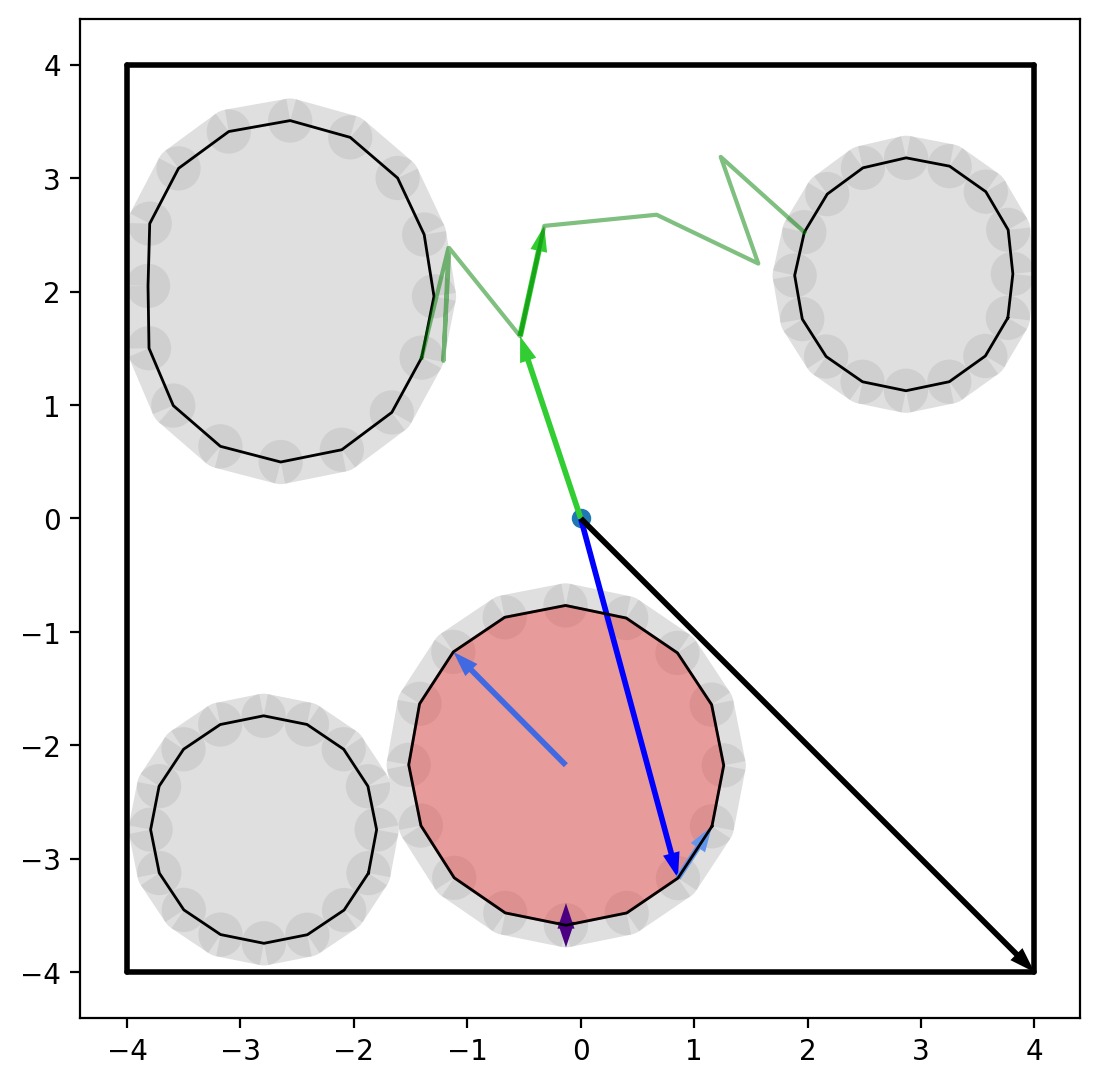

In [106]:
CF_sys2.change_r_expanded(CF_sys2.R[:,-1].flatten())
CF_sys2.plot_system(alpha_string = 0.5, alpha_bead = 0.5, alpha_colloid = 0.5)
plt.scatter([0],[0])
m = 3
k=14
plt.fill(CF_sys2.r_matrix[0,m,range(-1,CF_sys2.Nv)], CF_sys2.r_matrix[1,m,range(-1,CF_sys2.Nv)],color = 'red', alpha =0.3) 
plt.arrow(0,0, CF_sys2.r_matrix[0,3,k], CF_sys2.r_matrix[1,3,k], width = 0.05, length_includes_head = True, lw=0, color = 'blue')

plt.arrow(CF_sys2.r_matrix[0,3,k], CF_sys2.r_matrix[1,3,k], 
          CF_sys2.r_matrix[0,3,k+1]-CF_sys2.r_matrix[0,3,k], CF_sys2.r_matrix[1,3,k+1]-CF_sys2.r_matrix[1,3,k], 
          width = 0.05, length_includes_head = True, lw=0, color='cornflowerblue')
k=5
plt.arrow(CF_sys2.r_center_matrix[m,0], CF_sys2.r_center_matrix[m,1], 
          CF_sys2.r_matrix[0,m,k+1]-CF_sys2.r_center_matrix[m,0], CF_sys2.r_matrix[1,m,k+1]- CF_sys2.r_center_matrix[m,1], 
          width = 0.05, length_includes_head = True, lw=0, color = 'royalblue')

plt.arrow(CF_sys2.r_matrix[0,m,12], CF_sys2.r_matrix[1,m,12],
          0, CF_sys2.delt/2,
          width = 0.05, length_includes_head = True, lw=0, color = 'indigo')
plt.arrow(CF_sys2.r_matrix[0,m,12], CF_sys2.r_matrix[1,m,12],
          0, -CF_sys2.delt/2,
          width = 0.05, length_includes_head = True, lw=0, color = 'indigo')

n=4
plt.arrow(0,0, 
          CF_sys2.f_x_array[0,n], CF_sys2.f_y_array[0,n], width = 0.05, length_includes_head = True, lw=0, 
          color = 'limegreen')
plt.arrow(CF_sys2.f_x_array[0,n], CF_sys2.f_y_array[0,n], 
          CF_sys2.f_x_array[0,n+1]-CF_sys2.f_x_array[0,n], CF_sys2.f_y_array[0,n+1]-CF_sys2.f_y_array[0,n], 
          width = 0.05, length_includes_head = True, lw=0, 
          color = 'limegreen')
plt.arrow(0,0,4,-4,
          width = 0.05, length_includes_head = True, lw=0, 
          color = 'black')
plt.savefig('definition_soft_SS.png', dpi = 400)

## Fig S4B

In [ ]:
fd = 'SimResults_Nc_130_Nv_16_Np_10_Nf_100_volfracAct_0.79_volfrac_0.6_filfrac_0.27_solver_bdf_mLf4.8_soft_ERbreak_lowVis_constantF_VarC_25.45_seed1_18Aug'
list_dir = dic_combine_full[fd]
metadata_file = pd.read_csv(list_dir[0]+'/' + fd + '/' + 'metadata.csv')
CF_sys = rsssbcv.Soft_and_Filament(dim = int(metadata_file['Dimensions']),
                                      Nc = int(metadata_file['N colloids']),
                                      Nv = int(metadata_file['N vertices']),
                                      Nf = int(metadata_file['N filaments']),
                                      Np = int(metadata_file['N particles per filament']),
                                      Rc = float(metadata_file['baseline radius']), 
                                      bidisperse = float(metadata_file['bidisperse']),
                                      mLf = float(metadata_file['normalized length of strings']),
                                      v_char = float(metadata_file['v_char']),
                                      Ca = float(metadata_file['Ca']),
                                      St = float(metadata_file['St']),
                                      Re_R = float(metadata_file['Re_R']),
                                      Stk = float(metadata_file['Stk']),
                                      K1 = float(metadata_file['K1']),
                                      K2_pos = float(metadata_file['K2_pos']),
                                      K2_neg = float(metadata_file['K2_neg']),
                                      K3 = float(metadata_file['K3']),
                                      K4 = float(metadata_file['K4']),
                                      kr_b = float(metadata_file['repulsive constant from wall']), 
                                      kr_bf = float(metadata_file['kr_bf']),
                                      rho = float(metadata_file['rho']),
                                      seed = int(metadata_file['Seed']),
                                      random_init = True,
                                      periodic_bc = metadata_file['periodic boundary'][0],
                                      full_repulsion = metadata_file['full repulsion'][0],
                                      Aspect_ratio = float(metadata_file['Aspect_ratio']),
                                      Length_radius_ratio = float(metadata_file['Length_radius_ratio']), 
                                           viscous_ratio = float(metadata_file['viscous_ratio']))
filename = list_dir[0]+'/' + fd +'/SimResults_{0:04d}.hdf5'.format(0)
CF_sys.load_data(filename)
CF_sys.change_r_expanded(CF_sys.R[:, 0].flatten())

In [ ]:
folder_name = '/Volumes/RayLab01/soft_particle_simulation_incorp/Hdf5_Aug18/lowVis/mLf4.8/'
file_name = 'SimResults_Nc_130_Nv_16_Np_10_Nf_100_volfracAct_0.79_volfrac_0.6_filfrac_0.27_solver_bdf_mLf4.8_soft_ERbreak_lowVis_constantF_VarC_25.45_seed1_18Aug.hdf5'
result = {}
try:
    with h5py.File(folder_name+'/'+file_name, "r") as f:
        if('summarized data' in f.keys()):
            h5file_list = os.listdir(folder_name)
            dset = f['summarized data']
            result['ts'] = dset['Time'][:]
            result['t_ms'] = dset['Time(ms)'][:]
            dt = dset["Time(ms)"][:][0]
            result['shrinkage_arr'] = dset['Shrinkage'][:]
            shrinkage = dset['Shrinkage'][:]
            shrinkage_rate_ms = (np.hstack([1, shrinkage[0:-1]]) - shrinkage)/dt
            result['peak_ER_strain_arr'] = dset['peak_ER_strain_arr'][:]
            result['Fx_arr'] = dset['Force on the wall in x'][:]
            result['ER_intact_arr'] = dset['fraction of intact ER'][:]
            result['Urep_arr'] = dset['Urep_arr'][:]
            result['Ua_arr'] = dset['Ua_arr'][:]
            result['Ub_arr'] = dset['Ub_arr'][:]
            result['Ubf_arr'] = dset['Ubf_arr'][:]
            result['Ulc_arr'] = dset['Ulc_arr'][:]
            result['Ugamma_arr'] = dset['Ugamma_arr'][:]
            result['Ul_arr'] = dset['Ul_arr'][:]
            result['Ur_arr'] = dset['Ur_arr'][:]
            result['Urb_arr'] = dset['Urb_arr'][:]
            result['Urbf_arr'] = dset['Urbf_arr'][:]
            result['U_total_arr'] = dset['U_total_arr'][:]
            result['z_colloid_arr'] = dset['z_colloid_arr'][:]
            result['z_filament_arr'] = dset['z_filament_arr'][:]
            result['z_boundary_arr'] = dset['z_boundary_arr'][:]
            result['z_total_arr'] = dset['z_total_arr'][:]
            result['preserved_fraction_arr'] = dset['preserved_fraction_arr'][:]
            result['contaminated_list'] = dset['contaminated_list'][:]
            result['asp_all_arr'] = dset['asp_all_arr'][:]
            result['ori_all_arr'] = dset['ori_all_arr'][:]
            result['filament_frac_initial'] = dset.attrs['filament fraction']
            result['vol_frac_actual'] = dset.attrs['volume fraction']
            result['Nc'] = dset.attrs['N colloids']
            result['Nv'] = dset.attrs['N vertices']
            result['Nf'] = dset.attrs['N filaments']
            result['Np'] = dset.attrs['N particles per filament']
            result['mLf'] = dset.attrs['mLf']
            result['Lx0'] = dset.attrs['Lx0']
            result['Ly0'] = dset.attrs['Ly0']
            result['T_contr'] = dset.attrs['T_contr']
            result['boundary_forces_external'] = dset.attrs['boundary_force']
except Exception as e:
    print(e)

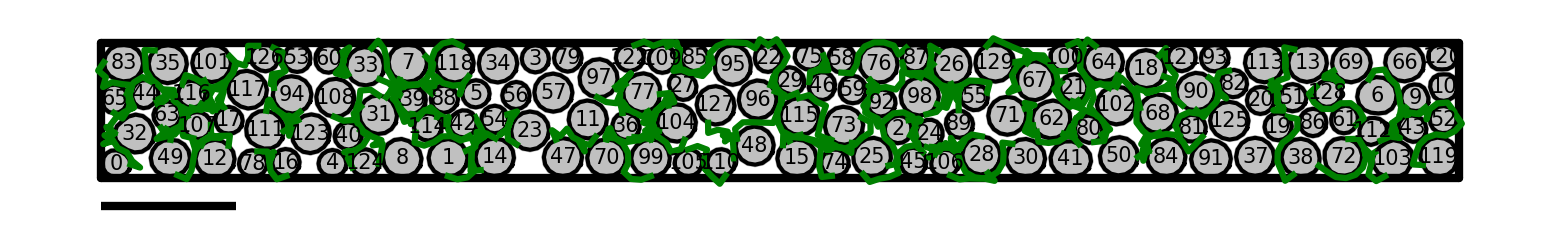

In [167]:
sns.reset_orig()
CF_sys.plot_system()
for i in range(CF_sys.Nc):
    plt.text(result['vac_loc_original'][i, 0], result['vac_loc_original'][i, 1], str(i), ha = 'center', va = 'center', fontsize = 5)

    
plt.gcf().set_dpi(300)
plt.axis('off')
ax = plt.gca()

plt.hlines(-7, -50, -40, color = 'black', linewidth = 2)
plt.savefig('Nc130_Nf100_mLf4.8_lowVis.png', dpi = 400)

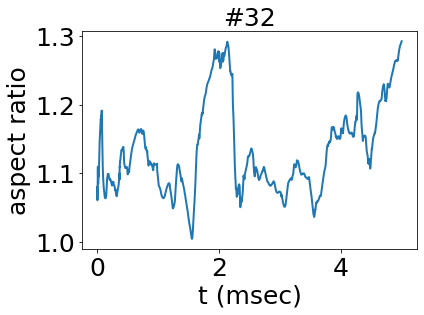

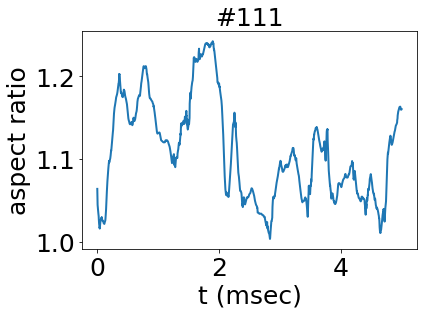

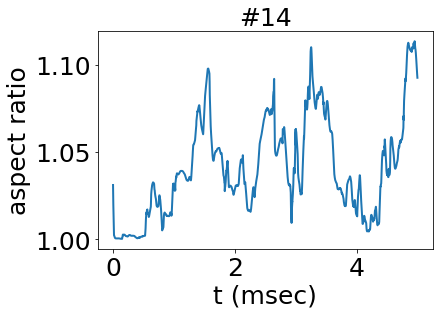

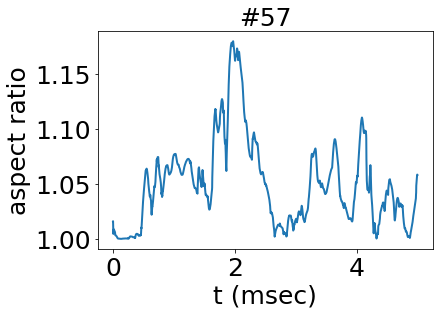

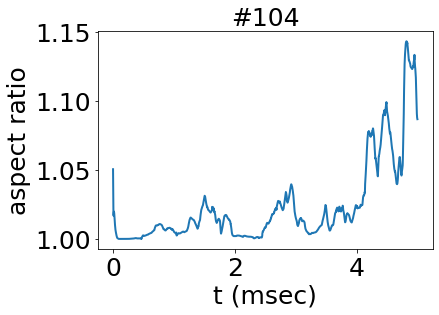

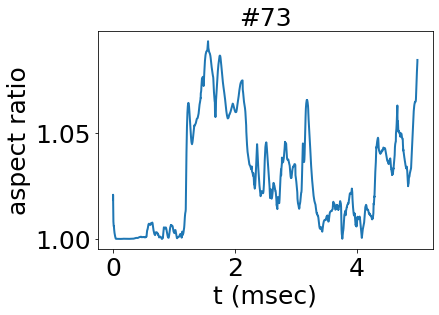

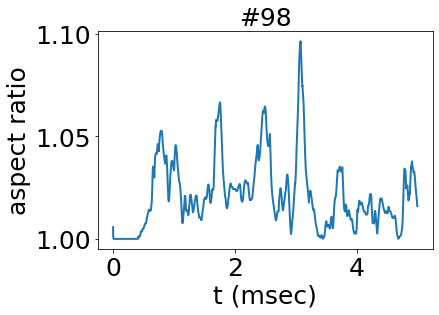

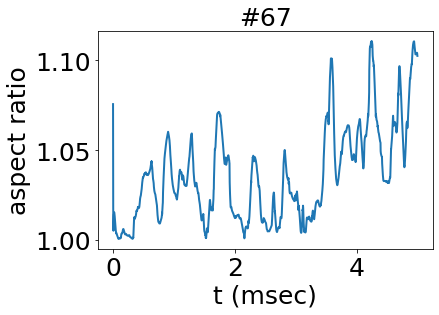

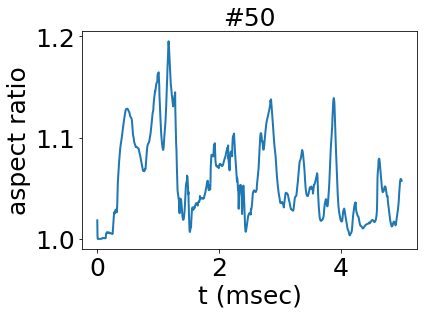

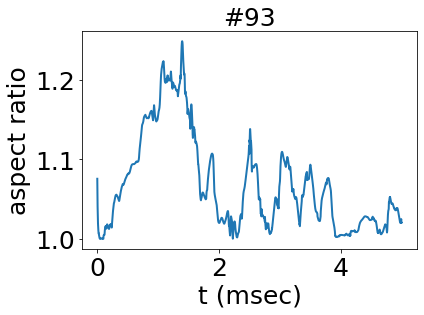

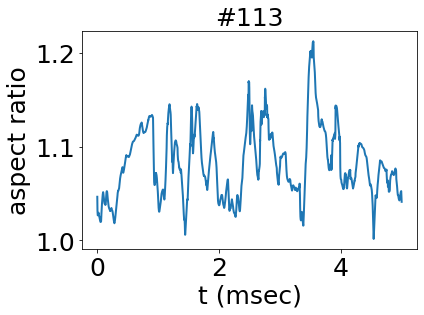

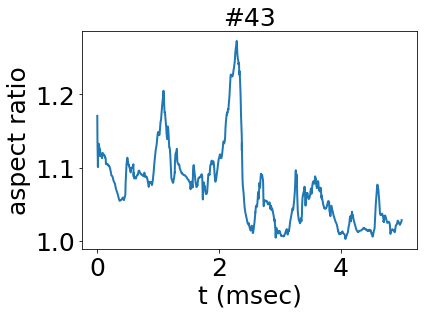

In [176]:
for j in [32,111,14,57,104,73,98,67,50,93,113,43]:
    plt.figure()
    plt.plot(result['t_ms'],result['asp_all_arr'][:,j], lw = 2)
    plt.xlabel('t (msec)', fontsize = 25)
    plt.ylabel('aspect ratio', fontsize = 25)
    plt.gca().tick_params(axis='both', labelsize = 25)
    plt.title('#'+str(j), fontsize = 25)
    plt.savefig('Nc130_Nf100_mLf4.8_lowVis_'+str(j)+'.png', dpi = 400, bbox_inches = "tight")

## Fig S4C&D

In [77]:
fd = 'SimResults_Nc_130_Nv_16_Np_10_Nf_100_volfracAct_0.79_volfrac_0.6_filfrac_0.27_solver_bdf_mLf4.8_soft_ERbreak_lowVis_constantF_VarC_25.45_seed1_18Aug'
list_dir = dic_combine_full[fd]
metadata_file = pd.read_csv(list_dir[0]+'/' + fd + '/' + 'metadata.csv')
CF_sys = rsssbcv.Soft_and_Filament(dim = int(metadata_file['Dimensions']),
                                      Nc = int(metadata_file['N colloids']),
                                      Nv = int(metadata_file['N vertices']),
                                      Nf = int(metadata_file['N filaments']),
                                      Np = int(metadata_file['N particles per filament']),
                                      Rc = float(metadata_file['baseline radius']), 
                                      bidisperse = float(metadata_file['bidisperse']),
                                      mLf = float(metadata_file['normalized length of strings']),
                                      v_char = float(metadata_file['v_char']),
                                      Ca = float(metadata_file['Ca']),
                                      St = float(metadata_file['St']),
                                      Re_R = float(metadata_file['Re_R']),
                                      Stk = float(metadata_file['Stk']),
                                      K1 = float(metadata_file['K1']),
                                      K2_pos = float(metadata_file['K2_pos']),
                                      K2_neg = float(metadata_file['K2_neg']),
                                      K3 = float(metadata_file['K3']),
                                      K4 = float(metadata_file['K4']),
                                      kr_b = float(metadata_file['repulsive constant from wall']), 
                                      kr_bf = float(metadata_file['kr_bf']),
                                      rho = float(metadata_file['rho']),
                                      seed = int(metadata_file['Seed']),
                                      random_init = True,
                                      periodic_bc = metadata_file['periodic boundary'][0],
                                      full_repulsion = metadata_file['full repulsion'][0],
                                      Aspect_ratio = float(metadata_file['Aspect_ratio']),
                                      Length_radius_ratio = float(metadata_file['Length_radius_ratio']), 
                                           viscous_ratio = float(metadata_file['viscous_ratio']))
filename = list_dir[0]+'/' + fd +'/SimResults_{0:04d}.hdf5'.format(0)
CF_sys.load_data(filename)
CF_sys.change_r_expanded(CF_sys.R[:, 0].flatten())

Loading Simulation data from disk .......
Loading hdf5 file


1.040139565696769
0.044326082612128705
1.0594900855986003
0.04730604502186936


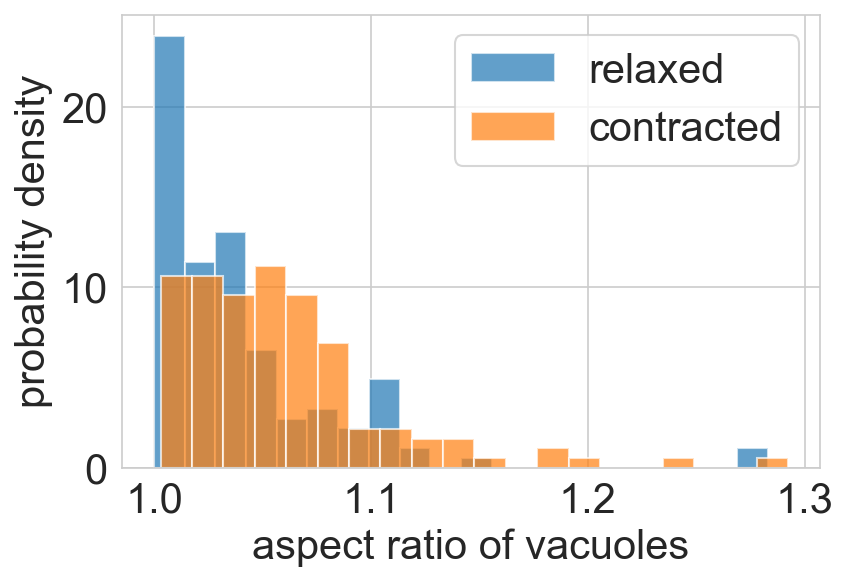

In [184]:
sns.set_style("whitegrid")
plt.figure(dpi = 150)
plt.hist(result['asp_all_arr'][100,:], alpha = 0.7, bins = 20, density = True, label = 'relaxed')# 0.01 msec
print(np.mean(result['asp_all_arr'][100,:]))
print(np.std(result['asp_all_arr'][100,:]))
plt.hist(result['asp_all_arr'][-1,:], alpha = 0.7, bins = 20, density = True, label = 'contracted')
print(np.mean(result['asp_all_arr'][-1,:]))
print(np.std(result['asp_all_arr'][-1,:]))
plt.xlabel('aspect ratio of vacuoles', fontsize = 20)
plt.ylabel('probability density', fontsize = 20)
plt.legend(fontsize = 20)
plt.gca().tick_params(axis='both', labelsize = 20)
plt.savefig('aspect_ratio_pdf_simulation_Nc130_Nf100_mLf4.8.png', dpi = 400, bbox_inches = "tight")

91.26925619857465
57.96127395174805
89.91734586226328
40.13623424860567


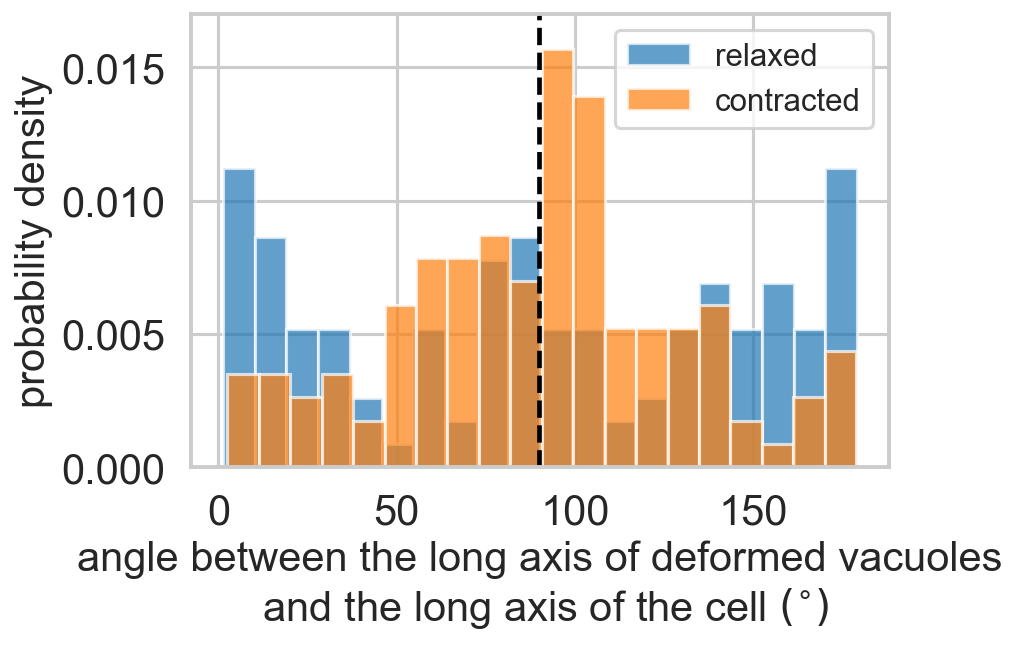

In [33]:
sns.set_style("whitegrid")
plt.figure(dpi = 150)
plt.hist(result['ori_all_arr'][100,:]/np.pi*180, alpha = 0.7, bins = 20, density = True, label = 'relaxed')
print(np.mean(result['ori_all_arr'][100,:]/np.pi*180))
print(np.std(result['ori_all_arr'][100,:]/np.pi*180))
plt.hist(result['ori_all_arr'][-1,:]/np.pi*180, alpha = 0.7, bins = 20, density = True, label = 'contracted')
print(np.mean(result['ori_all_arr'][-1,:]/np.pi*180))
print(np.std(result['ori_all_arr'][-1,:]/np.pi*180))
plt.xlabel('angle between the long axis of deformed vacuoles\n and the long axis of the cell '+r'$(^{\circ})$', fontsize = 20)
plt.ylabel('probability density', fontsize = 20)
plt.vlines(90,0,0.017, linestyle = 'dashed', color = 'black')
plt.ylim([0, 0.017])
plt.legend(fontsize = 15)
plt.gca().tick_params(axis='both', labelsize = 20)
plt.savefig('vacuole_angle_pdf_simulation_Nc130_Nf100_mLf4.8.png', dpi = 400, bbox_inches = "tight")

## Fig S5

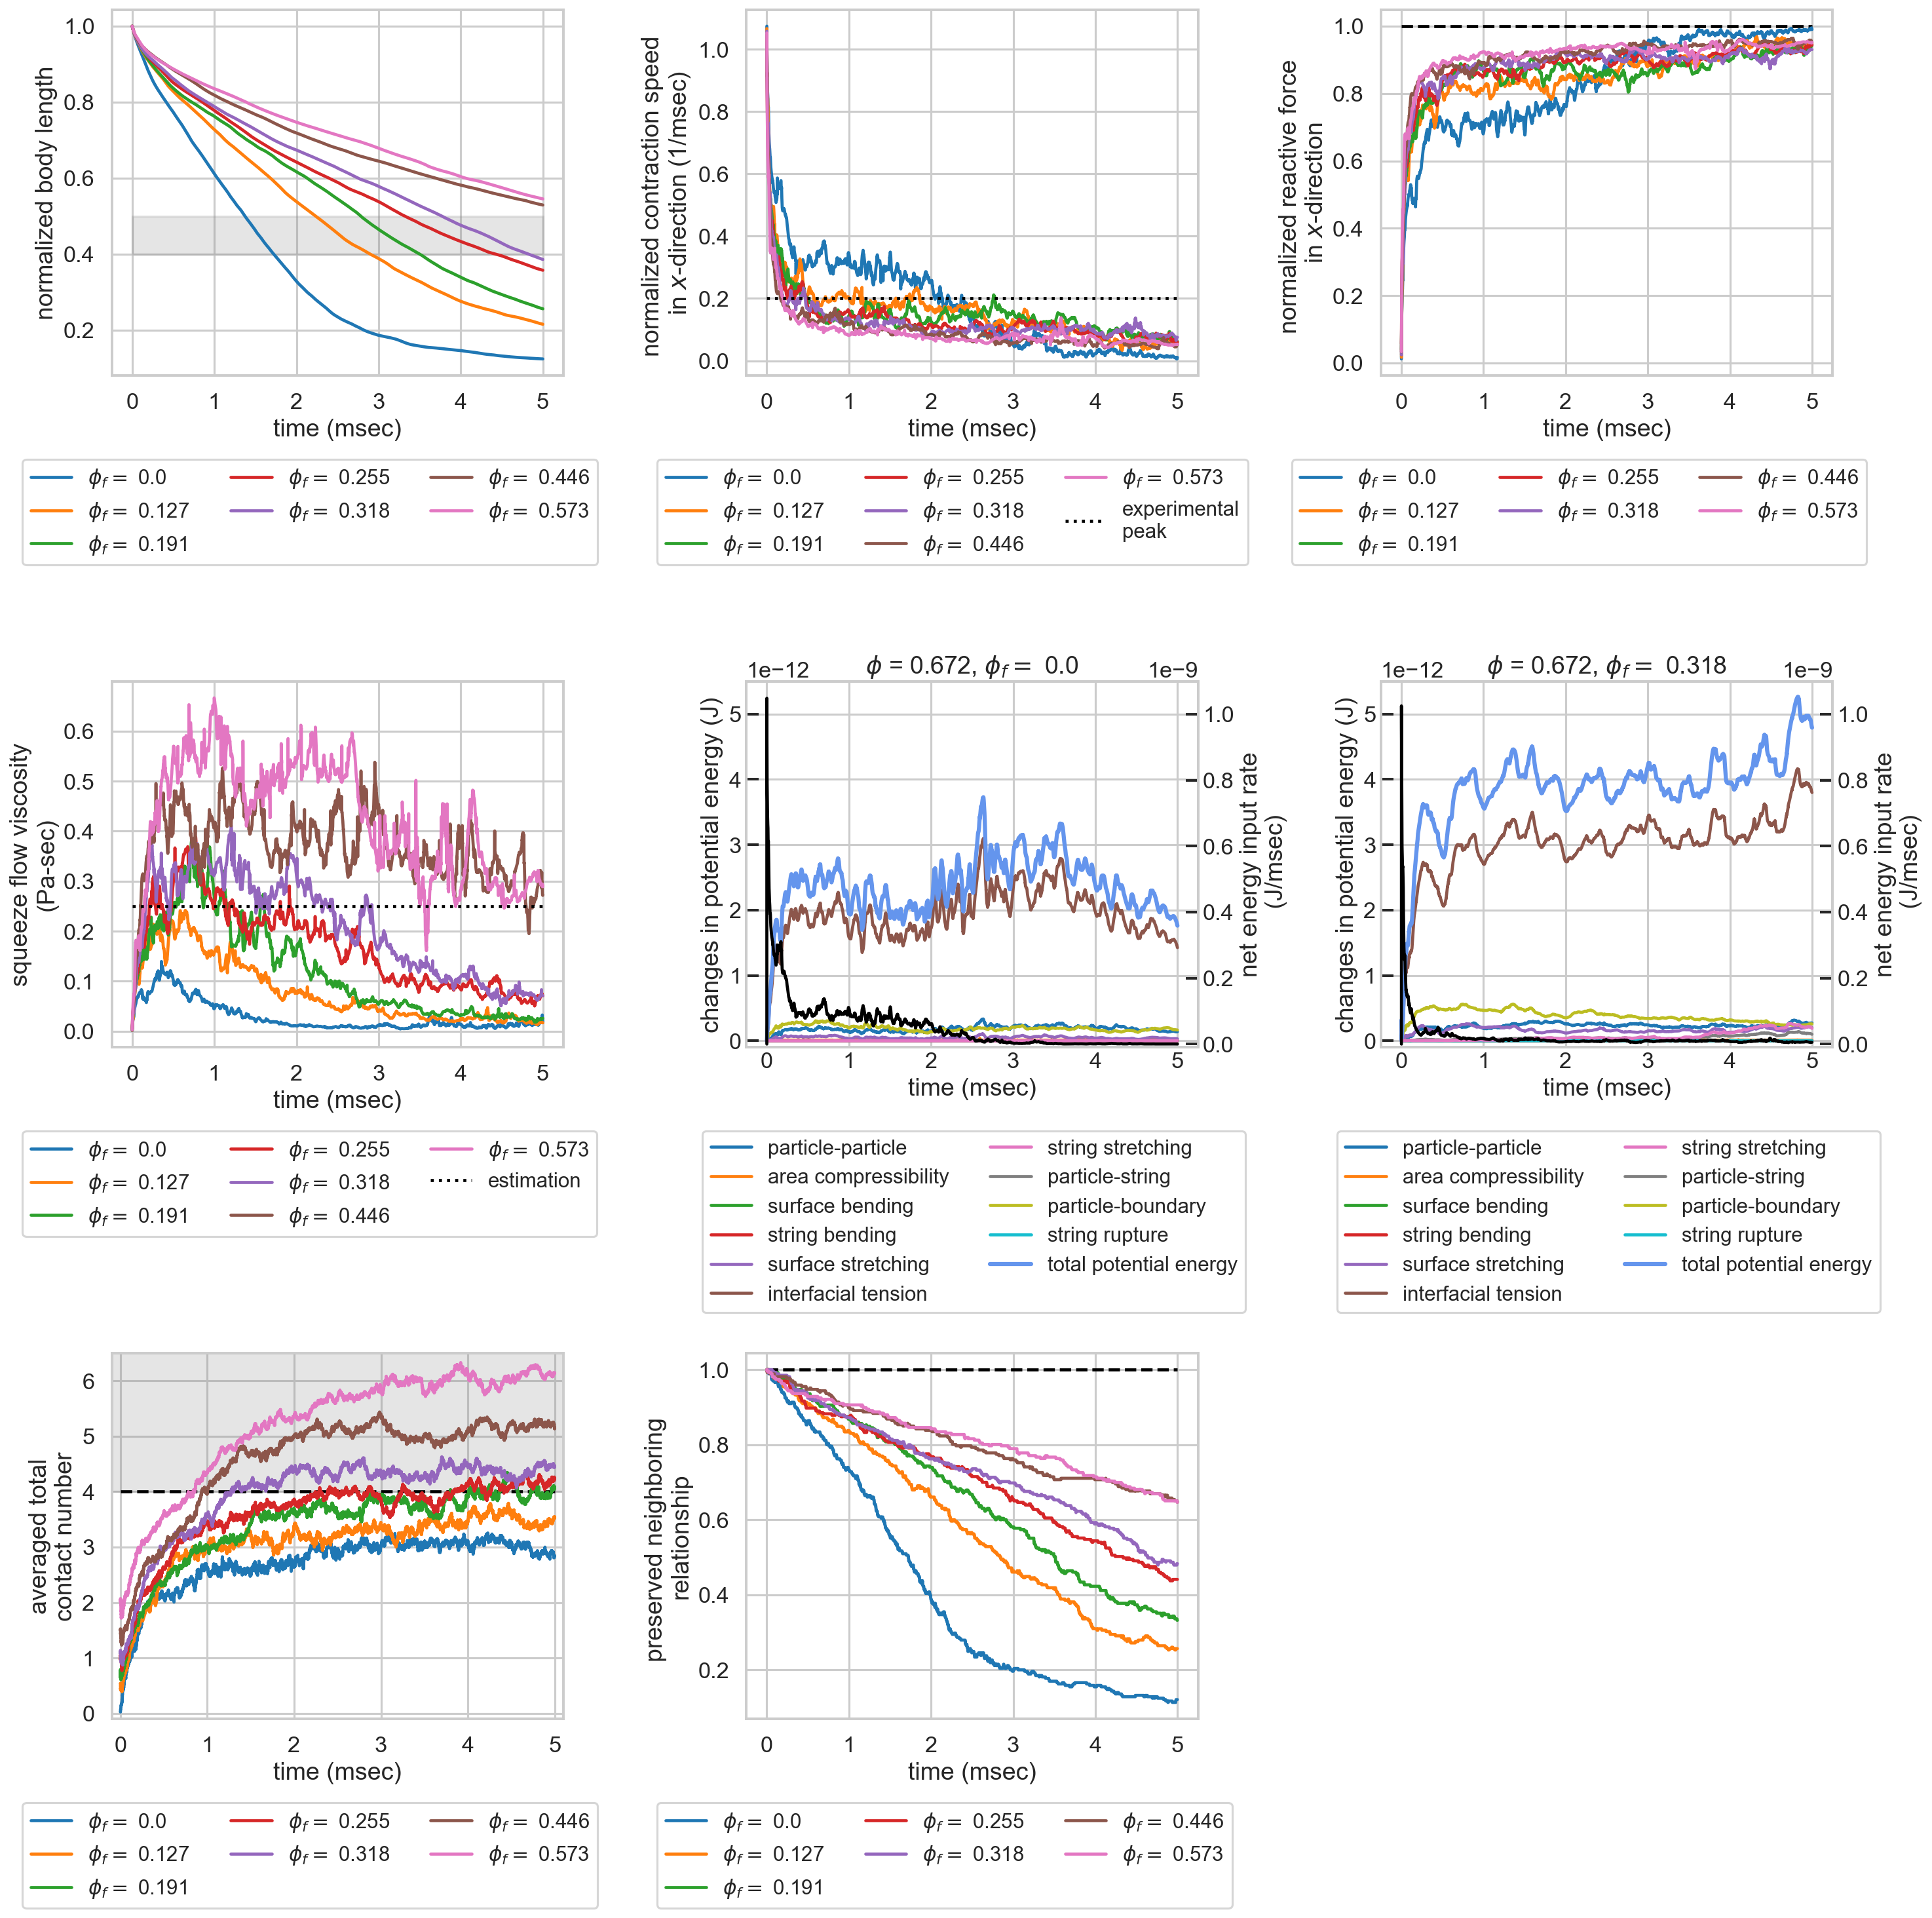

In [28]:
summarized = summarized_Nc110_lowVis_mLf48
E_conv = summarized['E_conv_all'][0]

plt.figure(dpi = 150, figsize=(20,20))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.subplot(3,3,1)
summarized = summarized_Nc110_lowVis_mLf48
id_list = [0,4,5,6,1,2,3]
for ids in id_list:
    plt.plot(summarized['t_ms_all'][ids], summarized['shrinkage_all'][ids], label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3))
plt.gca().fill_between([0,5], 0.4, 0.5, alpha = 0.2, color = 'gray')
plt.legend(ncol=3, bbox_to_anchor=(-0.22, -0.20), loc='upper left', fontsize = 15)
plt.xlabel('time (msec)')
plt.ylabel('normalized body length')

plt.subplot(3,3,2)
summarized = summarized_Nc110_lowVis_mLf48
id_list = [0,4,5,6,1,2,3]
for ids in id_list:
    plt.plot(summarized['t_ms_all'][ids], summarized['shrinkage_rate_ms_all'][ids], label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3))
plt.hlines(0.2, 0, 5, linestyle = 'dotted', color = 'black', label = 'experimental\npeak', zorder = 11)
plt.legend(ncol=3, bbox_to_anchor=(-0.22, -0.20), loc='upper left', fontsize = 15)
plt.xlabel('time (msec)')
plt.ylabel('normalized contraction speed \nin '+r'$x$'+'-direction (1/msec)')

plt.subplot(3,3,3)
summarized = summarized_Nc110_lowVis_mLf48
id_list = [0,4,5,6,1,2,3]
for ids in id_list:
    plt.plot(summarized['t_ms_all'][ids], summarized['normalized_Fx_arr_all'][ids], label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3))
plt.legend(ncol=3, bbox_to_anchor=(-0.22, -0.20), loc='upper left', fontsize = 15)
plt.hlines(1, 0, 5, color = 'black', linestyle = '--')
plt.xlabel('time (msec)')
plt.ylabel('normalized reactive force \nin '+r'$x$'+'-direction')

plt.subplot(3,3,4)
summarized = summarized_Nc110_lowVis_mLf48
id_list = [0,4,5,6,1,2,3]
for ids in id_list:
    plt.plot(summarized['t_ms_all'][ids], summarized['G_eta_all'][ids], label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3))
plt.hlines(0.25, 0, 5, linestyle = 'dotted', color = 'black', label = 'estimation', zorder = 11)
plt.legend(ncol=3, bbox_to_anchor=(-0.22, -0.20), loc='upper left', fontsize = 15)
plt.xlabel('time (msec)')
plt.ylabel('squeeze flow viscosity\n(Pa-sec)')

plt.subplot(3,3,5)
summarized = summarized_Nc110_lowVis_mLf48
j = 0
ER_break_threshold = 1.015
sac_bond_each = E_conv*1/2*CF_sys.kl*((ER_break_threshold-1)*CF_sys.dLf)**2
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*summarized['Urep_arr_all'][j], label = 'particle-particle')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ua_arr_all'][j]-np.min(summarized['Ua_arr_all'][j])), label = 'area compressibility')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ub_arr_all'][j]-np.min(summarized['Ub_arr_all'][j])), label = 'surface bending')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ubf_arr_all'][j]-np.min(summarized['Ubf_arr_all'][j])), label = 'string bending')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ulc_arr_all'][j]-np.min(summarized['Ulc_arr_all'][j])), label = 'surface stretching')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ugamma_arr_all'][j]-np.min(summarized['Ugamma_arr_all'][j])), label = 'interfacial tension')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ul_arr_all'][j]-np.min(summarized['Ul_arr_all'][j])), label = 'string stretching', zorder = 10)
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ur_arr_all'][j]-np.min(summarized['Ur_arr_all'][j])), label = 'particle-string')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*summarized['Urb_arr_all'][j], label = 'particle-boundary')
plt.plot(summarized['t_ms_all'][j], (1-summarized['ERintact_all'][j])*(summarized['Nf_all'][j])*sac_bond_each, label = 'string rupture')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['U_total_arr_all'][j]-np.min(summarized['U_total_arr_all'][j])), 
         label = 'total potential energy', color = 'cornflowerblue', lw = 3)
plt.legend(loc='upper left', bbox_to_anchor = (-0.12,-0.2), ncol = 2, fontsize = 15)
plt.xlabel('time (msec)')
plt.ylabel('changes in potential energy (J)')
plt.ylim([-0.1E-12, 5.5E-12])
plt.gca().tick_params(axis='both', direction = 'in')
ax2 = plt.gca().twinx()
t_ms =summarized['t_ms_all'][j]
ax2.plot(np.hstack([0, summarized['t_ms_all'][j][1:]]), 
         np.hstack([0, (
             summarized['E_conv_all'][j]*summarized['Lx0_all'][j]*
             (summarized['shrinkage_all'][j][:-1] - summarized['shrinkage_all'][j][1:])*
             (summarized['boundary_forces_all'][j] - summarized['Fx_arr_all'][j][:-1]))/(t_ms[1:] - t_ms[0:-1])])
         , label = 'net energy input', color = 'black')
ax2.set_ylabel('net energy input rate\n (J/msec)')
ax2.tick_params(axis='both', direction = 'in')
ax2.set_ylim([-0.1E-10, 11E-10])
plt.grid(b=None)
plt.title(r'$\phi$ = 0.672, '+r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][j],3))

plt.subplot(3,3,6)
j = 1
ER_break_threshold = 1.015
sac_bond_each = E_conv*1/2*CF_sys.kl*((ER_break_threshold-1)*CF_sys.dLf)**2

plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*summarized['Urep_arr_all'][j], label = 'particle-particle')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ua_arr_all'][j]-np.min(summarized['Ua_arr_all'][j])), label = 'area compressibility')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ub_arr_all'][j]-np.min(summarized['Ub_arr_all'][j])), label = 'surface bending')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ubf_arr_all'][j]-np.min(summarized['Ubf_arr_all'][j])), label = 'string bending')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ulc_arr_all'][j]-np.min(summarized['Ulc_arr_all'][j])), label = 'surface stretching')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ugamma_arr_all'][j]-np.min(summarized['Ugamma_arr_all'][j])), label = 'interfacial tension')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ul_arr_all'][j]-np.min(summarized['Ul_arr_all'][j])), label = 'string stretching', zorder = 10)
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['Ur_arr_all'][j]-np.min(summarized['Ur_arr_all'][j])), label = 'particle-string')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*summarized['Urb_arr_all'][j], label = 'particle-boundary')
plt.plot(summarized['t_ms_all'][j], (1-summarized['ERintact_all'][j])*(summarized['Nf_all'][j])*sac_bond_each, label = 'string rupture')
plt.plot(summarized['t_ms_all'][j], summarized['E_conv_all'][j]*(summarized['U_total_arr_all'][j]-np.min(summarized['U_total_arr_all'][j])), 
         label = 'total potential energy', color = 'cornflowerblue', lw = 3)
plt.legend(loc='upper left', bbox_to_anchor = (-0.12,-0.2), ncol = 2, fontsize = 15)
plt.xlabel('time (msec)')
plt.ylabel('changes in potential energy (J)')
plt.ylim([-0.1E-12, 5.5E-12])
plt.gca().tick_params(axis='both', direction = 'in')
ax2 = plt.gca().twinx()
t_ms =summarized['t_ms_all'][j]
ax2.plot(np.hstack([0, summarized['t_ms_all'][j][1:]]), 
         np.hstack([0, (
             summarized['E_conv_all'][j]*summarized['Lx0_all'][j]*
             (summarized['shrinkage_all'][j][:-1] - summarized['shrinkage_all'][j][1:])*
             (summarized['boundary_forces_all'][j] - summarized['Fx_arr_all'][j][:-1]))/(t_ms[1:] - t_ms[0:-1])])
         , label = 'net energy input', color = 'black')
ax2.set_ylabel('net energy input rate\n (J/msec)')
ax2.tick_params(axis='both', direction = 'in')
ax2.set_ylim([-0.1E-10, 11E-10])
plt.grid(b=None)
plt.title(r'$\phi$ = 0.672, '+r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][j],3))

plt.subplot(3,3,7)
summarized = summarized_Nc110_lowVis_mLf48
id_list = [0,4,5,6,1,2,3]
for ids in id_list:
    plt.plot(summarized['t_ms_all'][ids], summarized['z_total_arr_all'][ids], label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3))
plt.legend(ncol=3, bbox_to_anchor=(-0.22, -0.20), loc='upper left', fontsize = 15)
plt.hlines(4, 0, 5, color = 'black', linestyle = '--')
plt.xlabel('time (msec)')
plt.ylabel('averaged total\ncontact number')
plt.gca().fill_between([-0.1,5.1], 4, 6.5, alpha = 0.2, color = 'gray')
plt.xlim([-0.1,5.1])
plt.ylim([-0.1,6.5])

plt.subplot(3,3,8)
summarized = summarized_Nc110_lowVis_mLf48
id_list = [0,4,5,6,1,2,3]
for ids in id_list:
    plt.plot(summarized['t_ms_all'][ids], summarized['preserved_fraction_arr_all'][ids], label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3))
plt.legend(ncol=3, bbox_to_anchor=(-0.22, -0.20), loc='upper left', fontsize = 15)
plt.hlines(1, 0, 5, color = 'black', linestyle = '--')
plt.xlabel('time (msec)')
plt.ylabel('preserved neighboring \nrelationship')

plt.tight_layout()
plt.savefig('Nc110_Nfvar_mLf4.8_summary.png', dpi = 400, bbox_inches="tight")

Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
0.12075471698113208


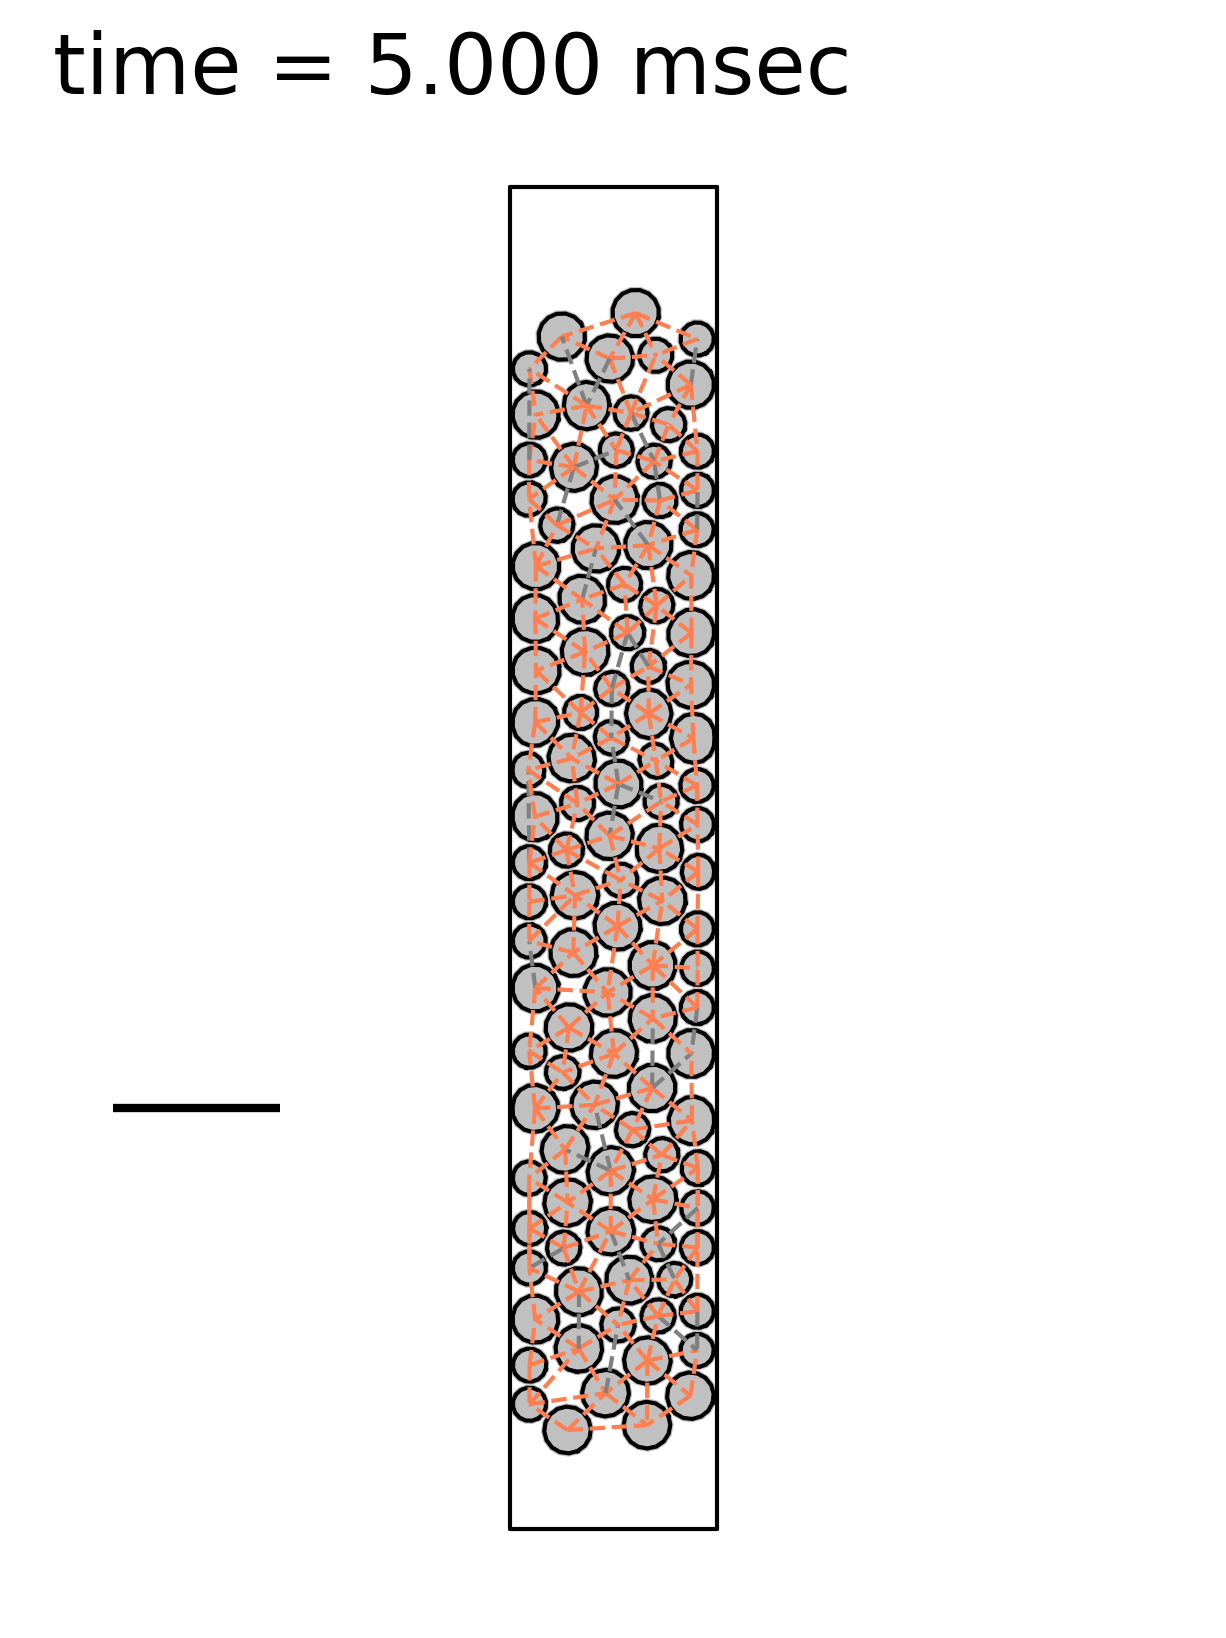

In [120]:
sns.reset_orig()
fd = 'SimResults_Nc_110_Nv_16_Np_10_Nf_0_volfracAct_0.67_volfrac_0.51_filfrac_0.0_solver_bdf_mLf4.8_soft_ERbreak_lowVis_constantF_VarC_25.45_seed1_18Aug'
list_dir = dic_combine_full[fd]
metadata_file = pd.read_csv(list_dir[0]+'/' + fd + '/' + 'metadata.csv')
CF_sys = rsssbcv.Soft_and_Filament(dim = int(metadata_file['Dimensions']),
                                      Nc = int(metadata_file['N colloids']),
                                      Nv = int(metadata_file['N vertices']),
                                      Nf = int(metadata_file['N filaments']),
                                      Np = int(metadata_file['N particles per filament']),
                                      Rc = float(metadata_file['baseline radius']), 
                                      bidisperse = float(metadata_file['bidisperse']),
                                      mLf = float(metadata_file['normalized length of strings']),
                                      v_char = float(metadata_file['v_char']),
                                      Ca = float(metadata_file['Ca']),
                                      St = float(metadata_file['St']),
                                      Re_R = float(metadata_file['Re_R']),
                                      Stk = float(metadata_file['Stk']),
                                      K1 = float(metadata_file['K1']),
                                      K2_pos = float(metadata_file['K2_pos']),
                                      K2_neg = float(metadata_file['K2_neg']),
                                      K3 = float(metadata_file['K3']),
                                      K4 = float(metadata_file['K4']),
                                      kr_b = float(metadata_file['repulsive constant from wall']), 
                                      kr_bf = float(metadata_file['kr_bf']),
                                      rho = float(metadata_file['rho']),
                                      seed = int(metadata_file['Seed']),
                                      random_init = True,
                                      periodic_bc = metadata_file['periodic boundary'][0],
                                      full_repulsion = metadata_file['full repulsion'][0],
                                      Aspect_ratio = float(metadata_file['Aspect_ratio']),
                                      Length_radius_ratio = float(metadata_file['Length_radius_ratio']), 
                                           viscous_ratio = float(metadata_file['viscous_ratio']))
# original
filename = list_dir[0]+'/' + fd + '/' + 'SimResults_0000.hdf5'
CF_sys.load_data(filename)
CF_sys.change_r_expanded(CF_sys.R[:, 0].flatten())
CF_sys.get_separation_vectors()
rp_original = CF_sys.compute_ridge_point()

# new
list_of_files = np.sort(os.listdir(list_dir[-1]+'/' + fd + '/'))
last_file = max(list_of_files,key=extract_number)
filename = list_dir[-1]+'/' + fd + '/' + last_file 
CF_sys.load_data(filename)
CF_sys.change_r_expanded(CF_sys.R[:, -1].flatten())
CF_sys.get_separation_vectors()

CF_sys.plot_system(lw = 1)
rp = CF_sys.compute_ridge_point()
preserved_fraction = rsssh.compare_ridge_points(rp_original, rp)
print(preserved_fraction)
for pair in rp:
    if pair in rp_original:
        plt.plot([CF_sys.r_center_matrix[pair[0], 0], CF_sys.r_center_matrix[pair[1], 0]], 
                 [CF_sys.r_center_matrix[pair[0], 1], CF_sys.r_center_matrix[pair[1], 1]], color = 'gray', linestyle = '--', lw = 1)
    else:
        plt.plot([CF_sys.r_center_matrix[pair[0], 0], CF_sys.r_center_matrix[pair[1], 0]], 
                 [CF_sys.r_center_matrix[pair[0], 1], CF_sys.r_center_matrix[pair[1], 1]], color = 'coral', linestyle = '--', lw = 1)
plt.axis('off')
ax = plt.gca()
plt.gcf().set_dpi(300)
time_text = ax.text(0.02, 1.01, '', transform=ax.transAxes, fontsize = 20)
time_text.set_text('')
t = CF_sys.Time[-1]/CF_sys.T_contr*5 # unit: msec
time_text.set_text('time = {:.3f} msec'.format(t))
plt.xlim([-35, 35])
plt.ylim([-45, 45])
plt.hlines(-15, -30, -20, color = 'black', linewidth = 2)
plt.savefig('Nc110_Nf0_t5msec_neighbor_pf12.1%.png', dpi = 400, bbox_inches="tight")

Loading Simulation data from disk .......
Loading hdf5 file
Loading Simulation data from disk .......
Loading hdf5 file
0.4830188679245283


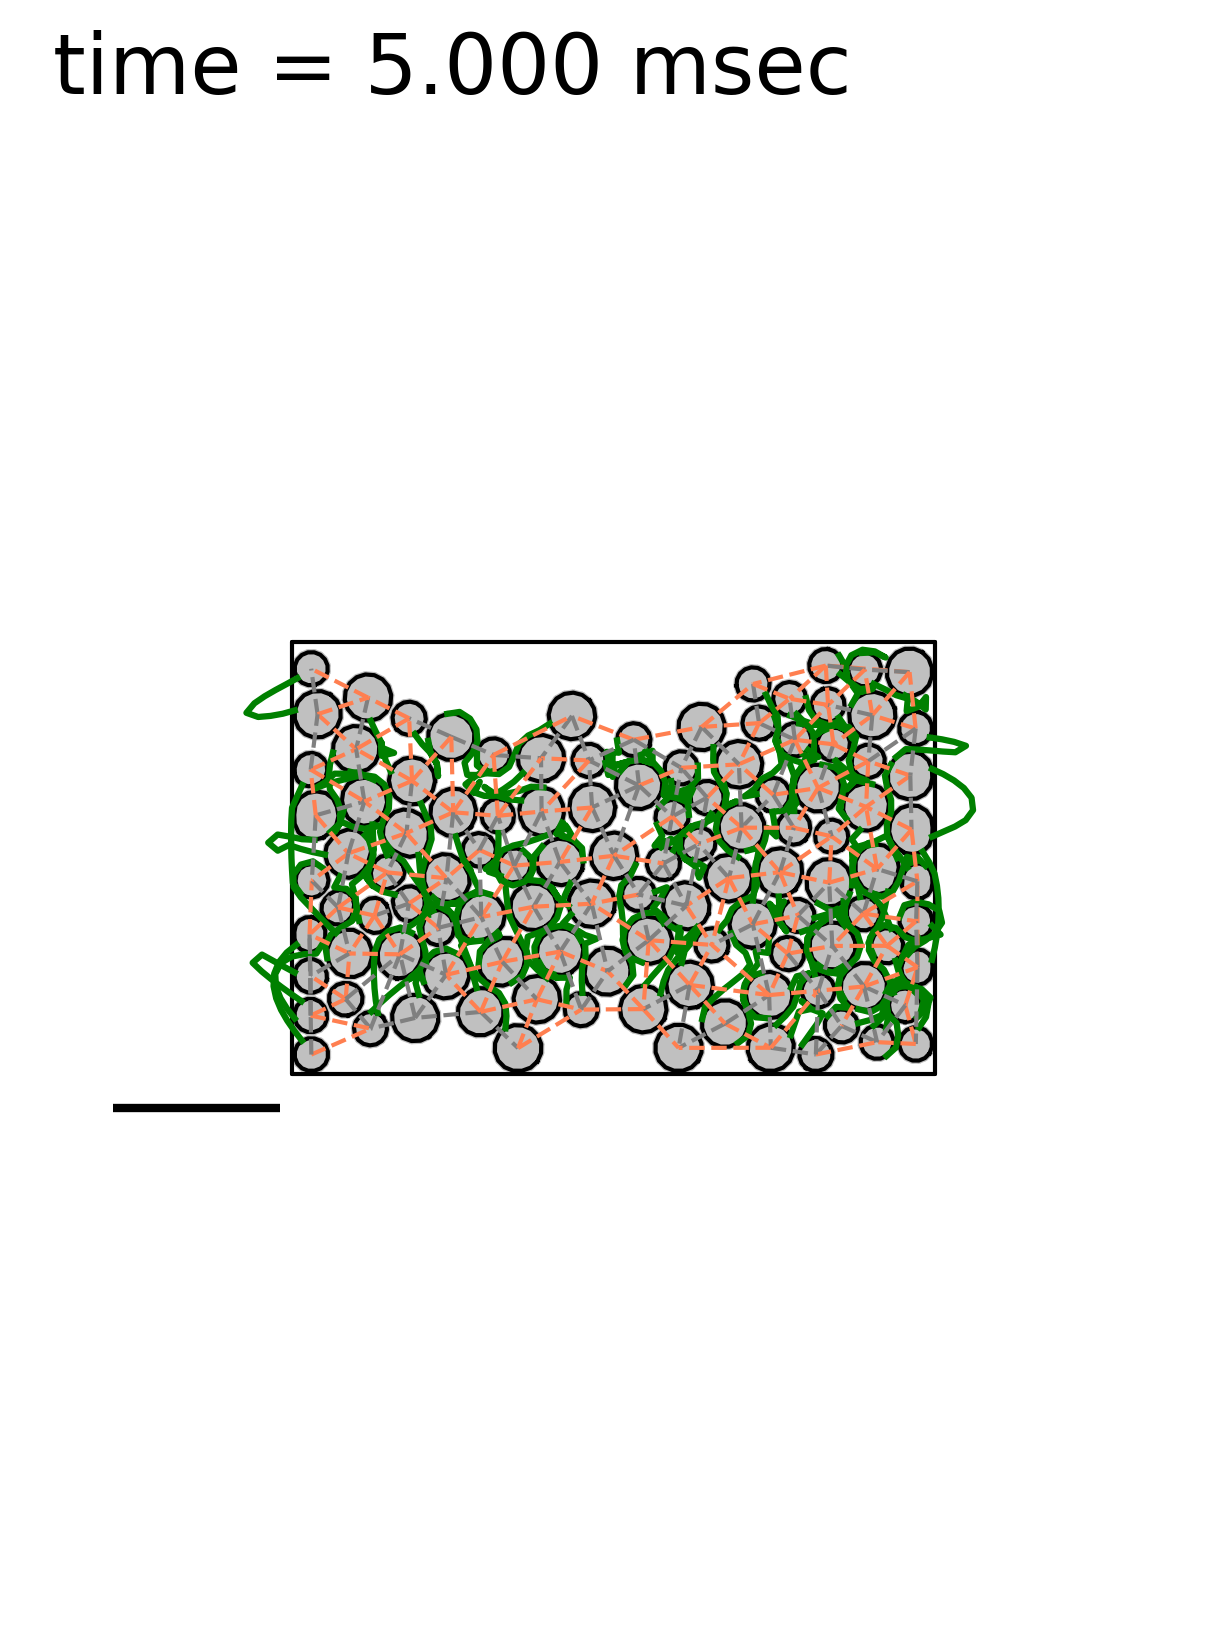

In [122]:
sns.reset_orig()
fd = 'SimResults_Nc_110_Nv_16_Np_10_Nf_100_volfracAct_0.67_volfrac_0.51_filfrac_0.32_solver_bdf_mLf4.8_soft_ERbreak_lowVis_constantF_VarC_25.45_seed1_18Aug'
list_dir = dic_combine_full[fd]
metadata_file = pd.read_csv(list_dir[0]+'/' + fd + '/' + 'metadata.csv')
CF_sys = rsssbcv.Soft_and_Filament(dim = int(metadata_file['Dimensions']),
                                      Nc = int(metadata_file['N colloids']),
                                      Nv = int(metadata_file['N vertices']),
                                      Nf = int(metadata_file['N filaments']),
                                      Np = int(metadata_file['N particles per filament']),
                                      Rc = float(metadata_file['baseline radius']), 
                                      bidisperse = float(metadata_file['bidisperse']),
                                      mLf = float(metadata_file['normalized length of strings']),
                                      v_char = float(metadata_file['v_char']),
                                      Ca = float(metadata_file['Ca']),
                                      St = float(metadata_file['St']),
                                      Re_R = float(metadata_file['Re_R']),
                                      Stk = float(metadata_file['Stk']),
                                      K1 = float(metadata_file['K1']),
                                      K2_pos = float(metadata_file['K2_pos']),
                                      K2_neg = float(metadata_file['K2_neg']),
                                      K3 = float(metadata_file['K3']),
                                      K4 = float(metadata_file['K4']),
                                      kr_b = float(metadata_file['repulsive constant from wall']), 
                                      kr_bf = float(metadata_file['kr_bf']),
                                      rho = float(metadata_file['rho']),
                                      seed = int(metadata_file['Seed']),
                                      random_init = True,
                                      periodic_bc = metadata_file['periodic boundary'][0],
                                      full_repulsion = metadata_file['full repulsion'][0],
                                      Aspect_ratio = float(metadata_file['Aspect_ratio']),
                                      Length_radius_ratio = float(metadata_file['Length_radius_ratio']), 
                                           viscous_ratio = float(metadata_file['viscous_ratio']))
# original
filename = list_dir[0]+'/' + fd + '/' + 'SimResults_0000.hdf5'
CF_sys.load_data(filename)
CF_sys.change_r_expanded(CF_sys.R[:, 0].flatten())
CF_sys.get_separation_vectors()
rp_original = CF_sys.compute_ridge_point()

# new
list_of_files = np.sort(os.listdir(list_dir[-1]+'/' + fd + '/'))
last_file = max(list_of_files,key=extract_number)
filename = list_dir[-1]+'/' + fd + '/' + last_file 
CF_sys.load_data(filename)
CF_sys.change_r_expanded(CF_sys.R[:, -1].flatten())
CF_sys.get_separation_vectors()

CF_sys.plot_system(lw = 1)
rp = CF_sys.compute_ridge_point()
preserved_fraction = rsssh.compare_ridge_points(rp_original, rp)
print(preserved_fraction)
for pair in rp:
    if pair in rp_original:
        plt.plot([CF_sys.r_center_matrix[pair[0], 0], CF_sys.r_center_matrix[pair[1], 0]], 
                 [CF_sys.r_center_matrix[pair[0], 1], CF_sys.r_center_matrix[pair[1], 1]], color = 'gray', linestyle = '--', lw = 1)
    else:
        plt.plot([CF_sys.r_center_matrix[pair[0], 0], CF_sys.r_center_matrix[pair[1], 0]], 
                 [CF_sys.r_center_matrix[pair[0], 1], CF_sys.r_center_matrix[pair[1], 1]], color = 'coral', linestyle = '--', lw = 1)
plt.axis('off')
ax = plt.gca()
plt.gcf().set_dpi(300)
time_text = ax.text(0.02, 1.01, '', transform=ax.transAxes, fontsize = 20)
time_text.set_text('')
t = CF_sys.Time[-1]/CF_sys.T_contr*5 # unit: msec
time_text.set_text('time = {:.3f} msec'.format(t))
plt.xlim([-35, 35])
plt.ylim([-45, 45])
plt.hlines(-15, -30, -20, color = 'black', linewidth = 2)
plt.savefig('Nc110_Nf100_t5msec_neighbor_pf48.3%.png', dpi = 400, bbox_inches="tight")

## Fig S6

In [126]:
L0 = 1E-3
D0 = 60E-6
fc = 0.75
tau_p = 3.5E-3
tau_c = 5E-3
tau_p_tilt = tau_p + tau_c/2
tau_c_tilt = tau_c/4

L = lambda t : L0*(1 - fc/2*(special.erf(tau_p_tilt/(np.sqrt(2)*tau_c_tilt)) 
                             - special.erf((tau_p_tilt - t)/(np.sqrt(2)*tau_c_tilt))))
dLdt = lambda t: -L0*fc/np.sqrt(2*np.pi*tau_c_tilt**2)*np.exp(-(t - tau_p_tilt)**2/(2*tau_c_tilt**2))
a = lambda t: L0*fc/np.sqrt(2*np.pi*tau_c_tilt**2)*(1/tau_c_tilt**2)*(t - tau_p_tilt)*np.exp(-(t - tau_p_tilt)**2/(2*tau_c_tilt**2))

Text(0.5, 1.0, 'estimated contracting strain rate\n from Mathijssen et al 2019')

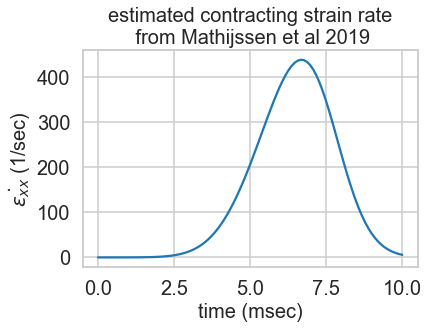

In [149]:
t = np.linspace(0, 10E-3, 100)
plt.plot(t*1000, -dLdt(t)/L(t))
plt.xlabel('time (msec)', fontsize = 20)
plt.ylabel(r'$\dot{\epsilon_{xx}}$ (1/sec)', fontsize = 20)
plt.gca().tick_params(labelsize = 20)
plt.title('estimated contracting strain rate\n from Mathijssen et al 2019', fontsize = 20)
plt.savefig('estimated_strain_rate_Mathijssen2019.png', dpi = 400, bbox_inches="tight")

## Fig S7

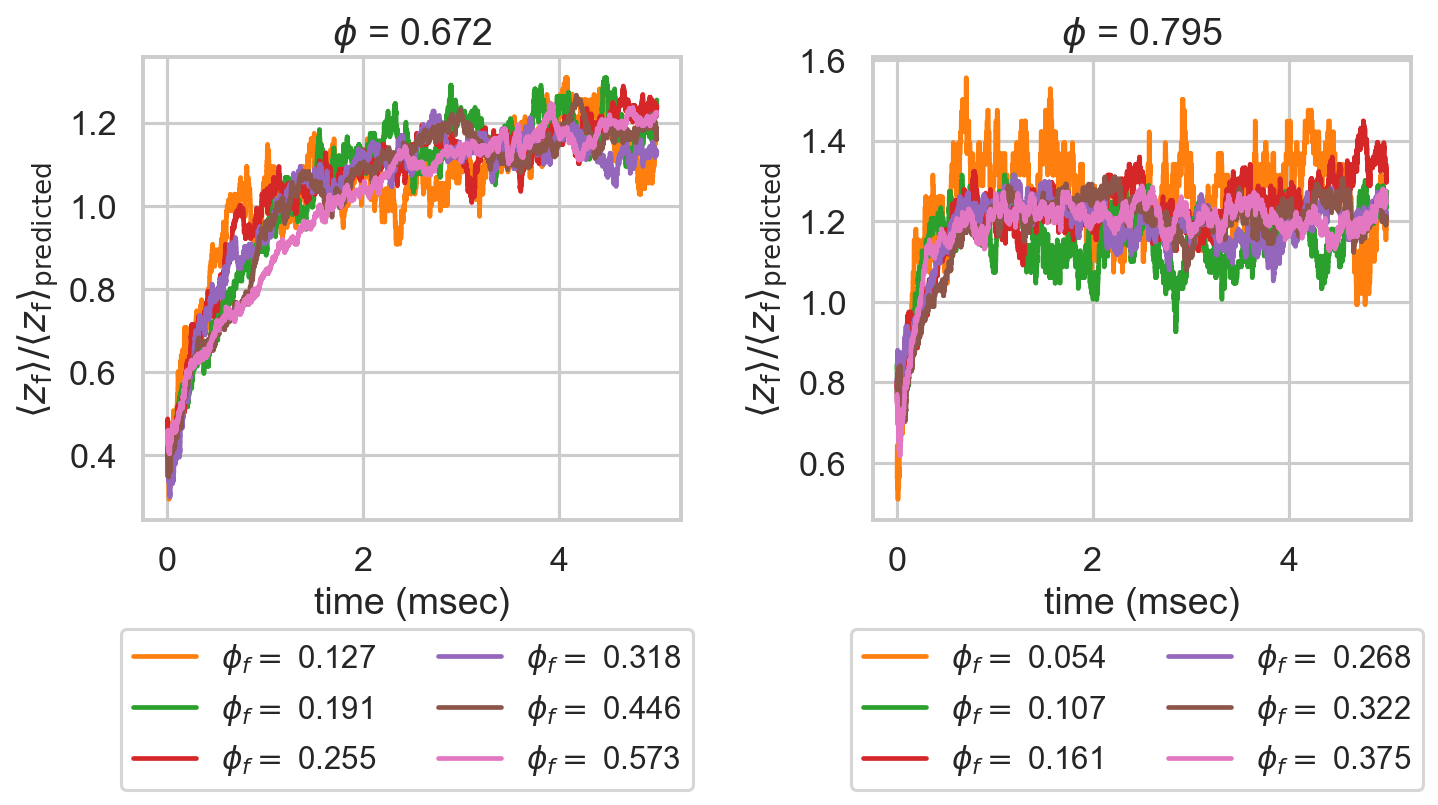

In [81]:
sns.set_context('talk')
sns.set_style('whitegrid')
plt.figure(dpi = 150, figsize = (10,6))
plt.subplot(1,2,1)
summarized = summarized_Nc110_lowVis_mLf48
id_list = [4,5,6,1,2,3]
for j, ids in enumerate(id_list):
    plt.plot(summarized['t_ms_all'][ids], 
             summarized['z_filament_arr_all'][ids]/(summarized['filament_fraction_all'][ids]*3.5/np.pi*4.8), 
             #summarized['z_filament_arr_all'][ids]/(summarized['Nf_all'][ids]*2.8*4.8/(2.4*np.pi*summarized['Nc_all'][ids])),
             label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3), color = 'C'+str(j+1))
plt.legend(ncol=2, bbox_to_anchor=(-0.07, -0.20), loc='upper left', fontsize = 15)
plt.xlabel('time (msec)')
#plt.ylabel(r'$\langle z_{\mathrm{f}}\rangle/\left(\frac{3.5\mathrm{mLf}}{\pi}\phi_{\mathrm{f}}\right)$')
plt.ylabel(r'$\langle z_{\mathrm{f}}\rangle/\langle z_{\mathrm{f}}\rangle_{\mathrm{predicted}}$')
plt.title(r'$\phi$ = 0.672')
plt.subplot(1,2,2)
summarized = summarized_Nc130_lowVis_mLf48
id_list = [4,5,6,1,2,3]
for j, ids in enumerate(id_list):
    plt.plot(summarized['t_ms_all'][ids], 
             summarized['z_filament_arr_all'][ids]/(summarized['filament_fraction_all'][ids]*3.5/np.pi*4.8),
             #summarized['z_filament_arr_all'][ids]/(summarized['Nf_all'][ids]*2.8*4.8/(2.4*np.pi*summarized['Nc_all'][ids])),
             label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3), color = 'C'+str(j+1))
plt.legend(ncol=2, bbox_to_anchor=(-0.07, -0.20), loc='upper left', fontsize = 15)
plt.xlabel('time (msec)')
plt.ylabel(r'$\langle z_{\mathrm{f}}\rangle/\langle z_{\mathrm{f}}\rangle_{\mathrm{predicted}}$')
plt.title(r'$\phi$ = 0.795')
plt.tight_layout()
plt.savefig('predicted_Zf.png', dpi = 400, bbox_inches="tight")

## Fig S8

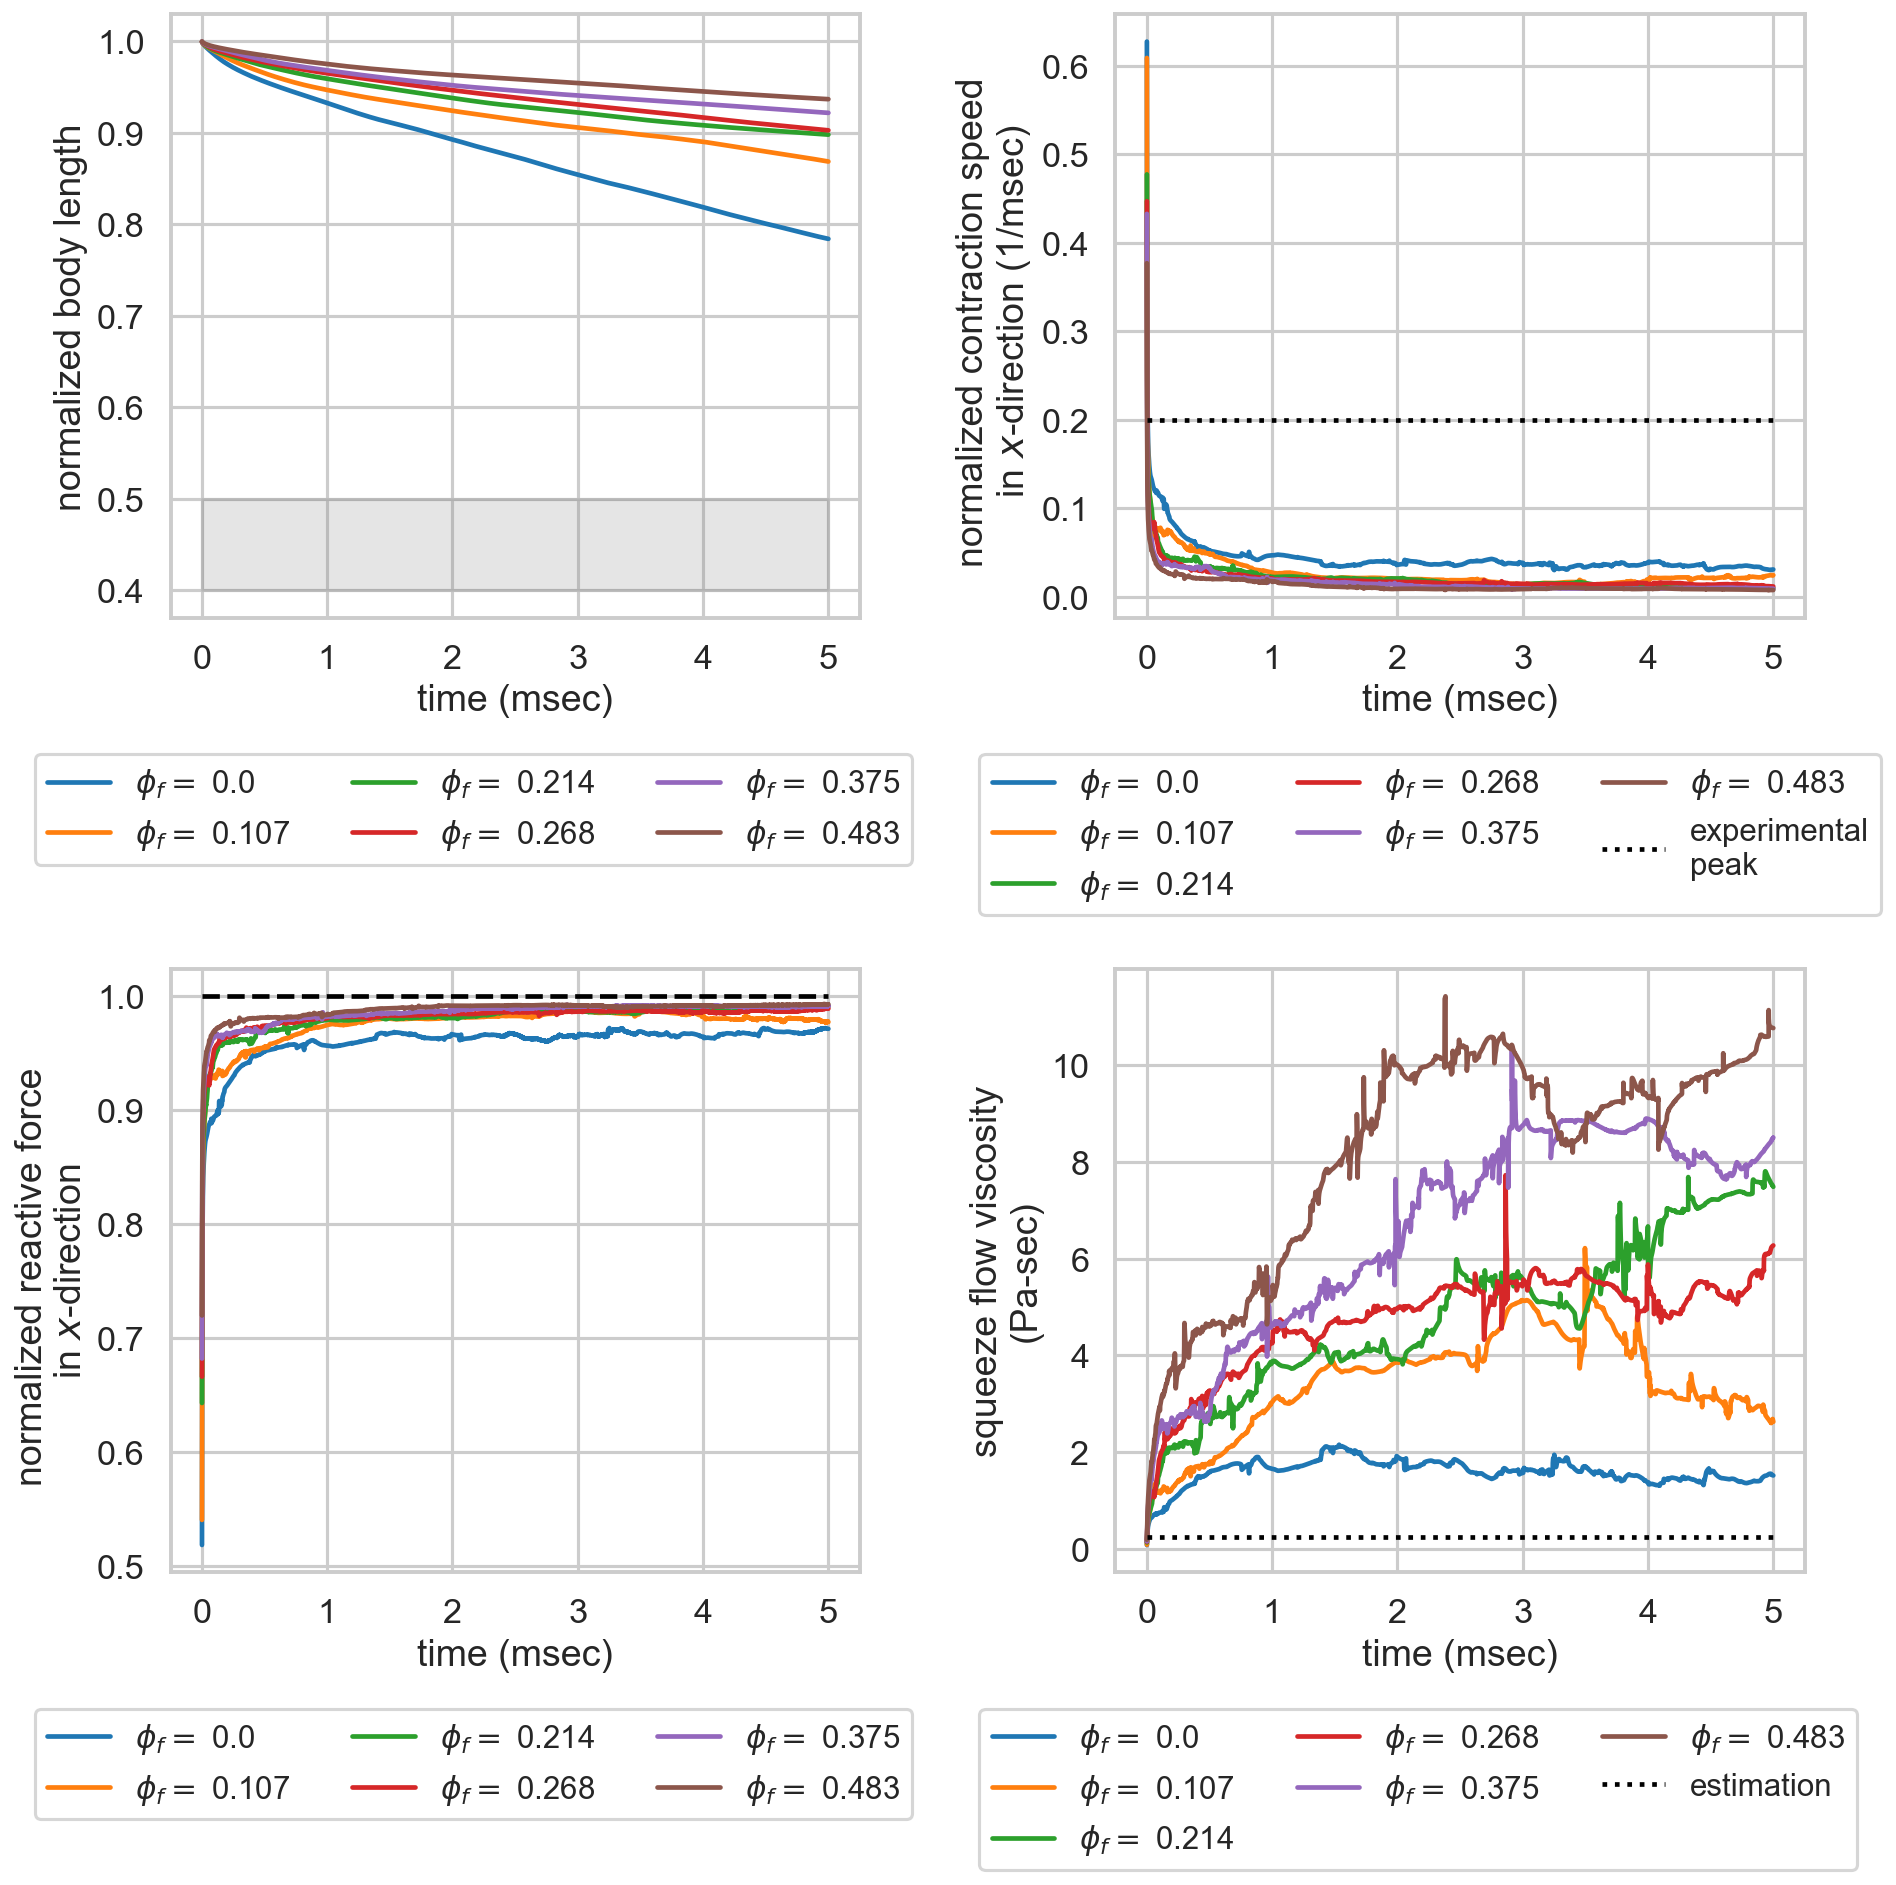

In [5]:
summarized = summarized_Nc130_highVis_mLf48
E_conv = summarized['E_conv_all'][0]

plt.figure(dpi = 150, figsize=(13,13))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.subplot(2,2,1)
summarized = summarized_Nc130_highVis_mLf48
id_list = [0,7,9,1,3,5]
for ids in id_list:
    plt.plot(summarized['t_ms_all'][ids], summarized['shrinkage_all'][ids], label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3))
plt.gca().fill_between([0,5], 0.4, 0.5, alpha = 0.2, color = 'gray')
plt.legend(ncol=3, bbox_to_anchor=(-0.22, -0.20), loc='upper left', fontsize = 15)
plt.xlabel('time (msec)')
plt.ylabel('normalized body length')

plt.subplot(2,2,2)
summarized = summarized_Nc130_highVis_mLf48
id_list = [0,7,9,1,3,5]
for ids in id_list:
    plt.plot(summarized['t_ms_all'][ids], summarized['shrinkage_rate_ms_all'][ids], label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3))
plt.hlines(0.2, 0, 5, linestyle = 'dotted', color = 'black', label = 'experimental\npeak', zorder = 11)
plt.legend(ncol=3, bbox_to_anchor=(-0.22, -0.20), loc='upper left', fontsize = 15)
plt.xlabel('time (msec)')
plt.ylabel('normalized contraction speed \n in '+r'$x$'+'-direction (1/msec)')

plt.subplot(2,2,3)
summarized = summarized_Nc130_highVis_mLf48
id_list = [0,7,9,1,3,5]
for ids in id_list:
    plt.plot(summarized['t_ms_all'][ids], summarized['normalized_Fx_arr_all'][ids], label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3))
plt.legend(ncol=3, bbox_to_anchor=(-0.22, -0.20), loc='upper left', fontsize = 15)
plt.hlines(1, 0, 5, color = 'black', linestyle = '--')
plt.xlabel('time (msec)')
plt.ylabel('normalized reactive force \nin '+r'$x$'+'-direction')

plt.subplot(2,2,4)
summarized = summarized_Nc130_highVis_mLf48
id_list = [0,7,9,1,3,5]
for ids in id_list:
    plt.plot(summarized['t_ms_all'][ids], summarized['G_eta_all'][ids], label = r'$\phi_f = $ %s'%round(summarized['filament_fraction_all'][ids],3))
plt.hlines(0.25, 0, 5, linestyle = 'dotted', color = 'black', label = 'estimation', zorder = 11)
plt.legend(ncol=3, bbox_to_anchor=(-0.22, -0.20), loc='upper left', fontsize = 15)
plt.xlabel('time (msec)')
plt.ylabel('squeeze flow viscosity\n(Pa-sec)')

plt.tight_layout()
plt.savefig('Nc130_Nfvar_mLf4.8_highVis_summary.png', dpi = 400, bbox_inches="tight")